Age effect - Questions

- What are the differences between the ages?
- Which genes and pathways are differentially expressed between 8w and 52w, between 52w and 104w, between 8w and 104w? Are they the same? Is there a gradient?
- Are they different for the two genders?
- Are they different for the two types?

# Loads

## Libraries and functions

In [1]:
options(jupyter.plot_mimetypes = c("text/plain", "image/png" ))

In [ ]:
source("install_libraries.R")

In [2]:
source("load_libraries.R")

Loading required package: S4Vectors
Loading required package: stats4
Loading required package: BiocGenerics
Loading required package: parallel

Attaching package: ‘BiocGenerics’

The following objects are masked from ‘package:parallel’:

    clusterApply, clusterApplyLB, clusterCall, clusterEvalQ,
    clusterExport, clusterMap, parApply, parCapply, parLapply,
    parLapplyLB, parRapply, parSapply, parSapplyLB

The following objects are masked from ‘package:stats’:

    IQR, mad, sd, var, xtabs

The following objects are masked from ‘package:base’:

    anyDuplicated, append, as.data.frame, cbind, colMeans, colnames,
    colSums, do.call, duplicated, eval, evalq, Filter, Find, get, grep,
    grepl, intersect, is.unsorted, lapply, lengths, Map, mapply, match,
    mget, order, paste, pmax, pmax.int, pmin, pmin.int, Position, rank,
    rbind, Reduce, rowMeans, rownames, rowSums, sapply, setdiff, sort,
    table, tapply, union, unique, unsplit, which, which.max, which.min


Attaching packag

*
*  Package WGCNA 1.63 loaded.
*
*    Important note: It appears that your system supports multi-threading,
*    but it is not enabled within WGCNA in R. 
*    To allow multi-threading within WGCNA with all available cores, use 
*
*          allowWGCNAThreads()
*
*    within R. Use disableWGCNAThreads() to disable threading if necessary.
*    Alternatively, set the following environment variable on your system:
*
*          ALLOW_WGCNA_THREADS=<number_of_processors>
*
*    for example 
*
*          ALLOW_WGCNA_THREADS=4
*
*    To set the environment variable in linux bash shell, type 
*
*           export ALLOW_WGCNA_THREADS=4
*
*     before running R. Other operating systems or shells will
*     have a similar command to achieve the same aim.
*





Attaching package: ‘WGCNA’

The following object is masked from ‘package:IRanges’:

    cor

The following object is masked from ‘package:S4Vectors’:

    cor

The following object is masked from ‘package:stats’:

    cor



Allowing multi-threading with up to 4 threads.



Attaching package: ‘igraph’

The following object is masked from ‘package:GenomicRanges’:

    union

The following object is masked from ‘package:IRanges’:

    union

The following object is masked from ‘package:S4Vectors’:

    union

The following objects are masked from ‘package:BiocGenerics’:

    normalize, union

The following objects are masked from ‘package:stats’:

    decompose, spectrum

The following object is masked from ‘package:base’:

    union

Loading required package: DOSE
DOSE v3.4.0  For help: https://guangchuangyu.github.io/DOSE

If you use DOSE in published research, please cite:
Guangchuang Yu, Li-Gen Wang, Guang-Rong Yan, Qing-Yu He. DOSE: an R/Bioconductor package for Disease Ontology Semantic and Enrichment analysis. Bioinformatics 2015, 31(4):608-609

clusterProfiler v3.6.0  For help: https://guangchuangyu.github.io/clusterProfiler

If you use clusterProfiler in published research, please cite:
Guangchuang Yu., Li-Gen Wang, Yanyan Han, Qing-Yu He. cluster

In [536]:
source("functions.R")

## Data

In [4]:
load("../results/dge/norm_counts.RData")
load("../results/dge/dge.RData")

In [68]:
load("../results/dge/dge_net.RData")
load("../results/dge/dge_net_connected_gene_colors.RData")
load("../results/dge/dge_net_pal2.RData")

In [69]:
module_nb = length(unique(connected_gene_colors))
pal2 = c(pal2, "white", "black")

# Global stats

,Wald padj < 0.05,LFC > 0 (Wald padj < 0.05),LFC < 0 (Wald padj < 0.05)
52w VS 8w,10.41,5.68,4.74
104w VS 8w,15.41,8.21,7.20
104w VS 52w,11.02,6.04,4.98


In [6]:
# Interactions between ages and types (after controlling gender)
SPF_52w_8w = results(dge,contrast= c(0,0,0,0,1,0,1/2,0,0,0), alpha=0.05, test="Wald")
GF_52w_8w = results(dge,contrast= c(0,0,0,0,1,0,1/2,0,0,1), alpha=0.05, test="Wald")
SPF_104w_8w = results(dge,contrast= c(0,0,0,1,0,1/2,0,0,0,0), alpha=0.05, test="Wald")
GF_104w_8w = results(dge,contrast= c(0,0,0,1,0,1/2,0,0,1,0), alpha=0.05, test="Wald")
SPF_104w_52w = results(dge,contrast= c(0,0,0,1,-1,1/2,-1/2,0,0,0), alpha=0.05, test="Wald")
GF_104w_52w = results(dge,contrast= c(0,0,0,1,-1,1/2,-1/2,0,1,-1), alpha=0.05, test="Wald")
# Stats
age_type_stats = matrix(0, nrow=6, ncol=3)
rownames(age_type_stats) = c("52w VS 8w (SPF)","52w VS 8w (GF)", "104w VS 8w (SPF)", "104w VS 8w (GF)", "104w VS 52w (SPF)", "104w VS 52w (GF)")
colnames(age_type_stats) = c("Wald padj < 0.05", "LFC > 0 (Wald padj < 0.05)", "LFC < 0 (Wald padj < 0.05)")
age_type_stats[1,] = get_stats_padj(SPF_52w_8w)
age_type_stats[2,] = get_stats_padj(GF_52w_8w)
age_type_stats[3,] = get_stats_padj(SPF_104w_8w)
age_type_stats[4,] = get_stats_padj(GF_104w_8w)
age_type_stats[5,] = get_stats_padj(SPF_104w_52w)
age_type_stats[6,] = get_stats_padj(GF_104w_52w)
age_type_stats

,Wald padj < 0.05,LFC > 0 (Wald padj < 0.05),LFC < 0 (Wald padj < 0.05)
52w VS 8w (SPF),6.71,3.84,2.87
52w VS 8w (GF),2.90,1.77,1.12
104w VS 8w (SPF),15.60,8.56,7.03
104w VS 8w (GF),8.98,4.69,4.29
104w VS 52w (SPF),7.11,4.27,2.84
104w VS 52w (GF),7.83,4.08,3.75


In [7]:
# Interactions between ages and genders (after controlling type)
F_52w_8w = results(dge,contrast= c(0,0,0,0,1,0,0,0,0,1/2), alpha=0.05, test="Wald")
M_52w_8w = results(dge,contrast= c(0,0,0,0,1,0,1,0,0,1/2), alpha=0.05, test="Wald")
F_104w_8w = results(dge,contrast= c(0,0,0,1,0,0,0,0,1/2,0), alpha=0.05, test="Wald")
M_104w_8w = results(dge,contrast= c(0,0,0,1,0,1,0,0,1/2,0), alpha=0.05, test="Wald")
F_104w_52w = results(dge,contrast= c(0,0,0,1,-1,0,0,0,1/2,-1/2), alpha=0.05, test="Wald")
M_104w_52w = results(dge,contrast= c(0,0,0,1,-1,1,-1,0,1/2,-1/2), alpha=0.05, test="Wald")
# Stats
age_gender_stats = matrix(0, nrow=6, ncol=3)
rownames(age_gender_stats) = c("52w VS 8w (F)","52w VS 8w (M)", "104w VS 8w (F)", "104w VS 8w (M)", "104w VS 52w (F)", "104w VS 52w (M)")
colnames(age_gender_stats) = c("Wald padj < 0.05", "LFC > 0 (Wald padj < 0.05)", "LFC < 0 (Wald padj < 0.05)")
age_gender_stats[1,] = get_stats_padj(F_52w_8w)
age_gender_stats[2,] = get_stats_padj(M_52w_8w)
age_gender_stats[3,] = get_stats_padj(F_104w_8w)
age_gender_stats[4,] = get_stats_padj(M_104w_8w)
age_gender_stats[5,] = get_stats_padj(F_104w_52w)
age_gender_stats[6,] = get_stats_padj(M_104w_52w)
age_gender_stats

,Wald padj < 0.05,LFC > 0 (Wald padj < 0.05),LFC < 0 (Wald padj < 0.05)
52w VS 8w (F),11.00,6.11,4.89
52w VS 8w (M),2.06,1.26,0.80
104w VS 8w (F),8.89,5.18,3.70
104w VS 8w (M),17.89,9.29,8.60
104w VS 52w (F),1.40,0.82,0.58
104w VS 52w (M),18.69,9.53,9.16


In [8]:
# Interactions between ages, types and genders
F_SPF_52w_8w = results(dge,contrast= c(0,0,0,0,1,0,0,0,0,0), alpha=0.05, test="Wald")
F_GF_52w_8w = results(dge,contrast= c(0,0,0,0,1,0,0,0,0,1), alpha=0.05, test="Wald")
M_SPF_52w_8w = results(dge,contrast= c(0,0,0,0,1,0,1,0,0,0), alpha=0.05, test="Wald")
M_GF_52w_8w = results(dge,contrast= c(0,0,0,0,1,0,1,0,0,1), alpha=0.05, test="Wald")
F_SPF_104w_8w = results(dge,contrast= c(0,0,0,1,0,0,0,0,0,0), alpha=0.05, test="Wald")
F_GF_104w_8w = results(dge,contrast= c(0,0,0,1,0,0,0,0,1,0), alpha=0.05, test="Wald")
M_SPF_104w_8w = results(dge,contrast= c(0,0,0,1,0,1,0,0,0,0), alpha=0.05, test="Wald")
M_GF_104w_8w = results(dge,contrast= c(0,0,0,1,0,1,0,0,1,0), alpha=0.05, test="Wald")
F_SPF_104w_52w = results(dge,contrast= c(0,0,0,1,-1,0,0,0,0,0), alpha=0.05, test="Wald")
F_GF_104w_52w = results(dge,contrast= c(0,0,0,1,-1,0,0,0,1,-1), alpha=0.05, test="Wald")
M_SPF_104w_52w = results(dge,contrast= c(0,0,0,1,-1,1,-1,0,0,0), alpha=0.05, test="Wald")
M_GF_104w_52w = results(dge,contrast= c(0,0,0,1,-1,1,-1,0,1,-1), alpha=0.05, test="Wald")
# Stats
age_gender_type_stats = matrix(0, nrow=12, ncol=3)
rownames(age_gender_type_stats) = c("52w VS 8w (F, SPF)","52w VS 8w (F, GF)", "52w VS 8w (M, SPF)", "52w VS 8w (M, GF)", "104w VS 8w (F, SPF)", "104w VS 8w (F, GF)", "104w VS 8w (M, SPF)", "104w VS 8w (M, GF)", "104w VS 52w (F, SPF)", "104w VS 52w (F, GF)", "104w VS 52w (M, SPF)", "104w VS 52w (M, GF)")
colnames(age_gender_type_stats) = c("Wald padj < 0.05", "LFC > 0 (Wald padj < 0.05)", "LFC < 0 (Wald padj < 0.05)")
age_gender_type_stats[1,] = get_stats_padj(F_SPF_52w_8w)
age_gender_type_stats[2,] = get_stats_padj(F_GF_52w_8w)
age_gender_type_stats[3,] = get_stats_padj(M_SPF_52w_8w)
age_gender_type_stats[4,] = get_stats_padj(M_GF_52w_8w)
age_gender_type_stats[5,] = get_stats_padj(F_SPF_104w_8w)
age_gender_type_stats[6,] = get_stats_padj(F_GF_104w_8w)
age_gender_type_stats[7,] = get_stats_padj(M_SPF_104w_8w)
age_gender_type_stats[8,] = get_stats_padj(M_GF_104w_8w)
age_gender_type_stats[9,] = get_stats_padj(F_SPF_104w_52w)
age_gender_type_stats[10,] = get_stats_padj(F_GF_104w_52w)
age_gender_type_stats[11,] = get_stats_padj(M_SPF_104w_52w)
age_gender_type_stats[12,] = get_stats_padj(M_GF_104w_52w)
age_gender_type_stats

# Comparison between the ages (after controlling for type and gender)
Questions

- What are the differences between the ages?
- Which genes and pathways are differentially expressed between 8w and 52w, between 52w and 104w, between 8w and 104w? Are they the same? Is there a gradient?

In [10]:
# Comparison between the ages (after controlling for type and gender)
global_52w_8w = results(dge, contrast= c(0,0,0,0,1,0,1/2,0,0,1/2), alpha=0.05, test="Wald")
global_104w_8w = results(dge, contrast= c(0,0,0,1,0,1/2,0,0,1/2,0), alpha=0.05, test="Wald")
global_104w_52w = results(dge, contrast= c(0,0,0,1,-1,1/2,-1/2,0,1/2,-1/2), alpha=0.05, test="Wald")

In [11]:
samples = c(
    'SPF_8w_F_1_2','SPF_8w_F_3_2','SPF_8w_F_4_2','SPF_8w_F_5_2','GF_8w_F_1_2','GF_8w_F_2_2','GF_8w_F_3_2','GF_8w_F_4_2','GF_8w_F_5_2','SPF_8w_M_1_2','SPF_8w_M_2_2','SPF_8w_M_3_2','SPF_8w_M_4_2','GF_8w_M_1_2','GF_8w_M_2_2','GF_8w_M_3_2','GF_8w_M_4_2',
    'SPF_52w_F_1_2','SPF_52w_F_2_2','SPF_52w_F_3_2','SPF_52w_F_4_2','SPF_52w_F_5_2','SPF_52w_F_6_2','GF_52w_F_1_2','GF_52w_F_2_2','GF_52w_F_3_2','GF_52w_F_4_2','GF_52w_F_5_2','GF_52w_F_6_2','SPF_52w_M_1_2','SPF_52w_M_2_2','SPF_52w_M_3_2','SPF_52w_M_4_2','SPF_52w_M_5_2','GF_52w_M_1_2','GF_52w_M_2_2','GF_52w_M_3_2','GF_52w_M_4_2',
    'SPF_104w_F_1_2','SPF_104w_F_2_2','SPF_104w_F_3_2','GF_104w_F_1_2','GF_104w_F_2_2','GF_104w_F_3_2','SPF_104w_M_1_2','SPF_104w_M_2_2','SPF_104w_M_3_2','SPF_104w_M_4_2','SPF_104w_M_5_2','SPF_104w_M_6_2','SPF_104w_M_7_2','SPF_104w_M_8_2','SPF_104w_M_9_2','SPF_104w_M_10_2','SPF_104w_M_11_2','SPF_104w_M_12_2','SPF_104w_M_13_2','SPF_104w_M_14_2','GF_104w_M_1_2','GF_104w_M_2_2')

## Stats

In [12]:
global_stats = matrix(0, nrow=3, ncol=3)
rownames(global_stats) = c("52w VS 8w", "104w VS 8w", "104w VS 52w")
colnames(global_stats) = c("Wald padj < 0.05", "LFC > 0 (Wald padj < 0.05)", "LFC < 0 (Wald padj < 0.05)")
global_stats[1,] = get_stats_padj(global_52w_8w)
global_stats[2,] = get_stats_padj(global_104w_8w)
global_stats[3,] = get_stats_padj(global_104w_52w)
global_stats

,Wald padj < 0.05,LFC > 0 (Wald padj < 0.05),LFC < 0 (Wald padj < 0.05)
52w VS 8w,10.41,5.68,4.74
104w VS 8w,15.41,8.21,7.20
104w VS 52w,11.02,6.04,4.98


## Differentially expressed genes

In [497]:
age_data = list(global_52w_8w, global_104w_8w, global_104w_52w)
names(age_data) = c("52w VS 8w", "104w VS 8w", "104w VS 52w")
age_deg = extract_diff_expr_genes(age_data, "age_data")

Can't find mm10/geneSymbol length data in genLenDataBase...
Warning message in grep(txdbPattern, installedPackages):
“argument 'pattern' has length > 1 and only the first element will be used”Found the annotaion package, TxDb.Mmusculus.UCSC.mm10.knownGene
Trying to get the gene lengths from it.
Warning message in pcls(G):
“initial point very close to some inequality constraints”Can't find mm10/geneSymbol length data in genLenDataBase...
Warning message in grep(txdbPattern, installedPackages):
“argument 'pattern' has length > 1 and only the first element will be used”Found the annotaion package, TxDb.Mmusculus.UCSC.mm10.knownGene
Trying to get the gene lengths from it.
Warning message in pcls(G):
“initial point very close to some inequality constraints”Can't find mm10/geneSymbol length data in genLenDataBase...
Warning message in grep(txdbPattern, installedPackages):
“argument 'pattern' has length > 1 and only the first element will be used”Found the annotaion package, TxDb.Mmusculus.UC

In [14]:
annot = as.data.frame(colData(dge)[, c("age", "gender", "type")])

## Counts

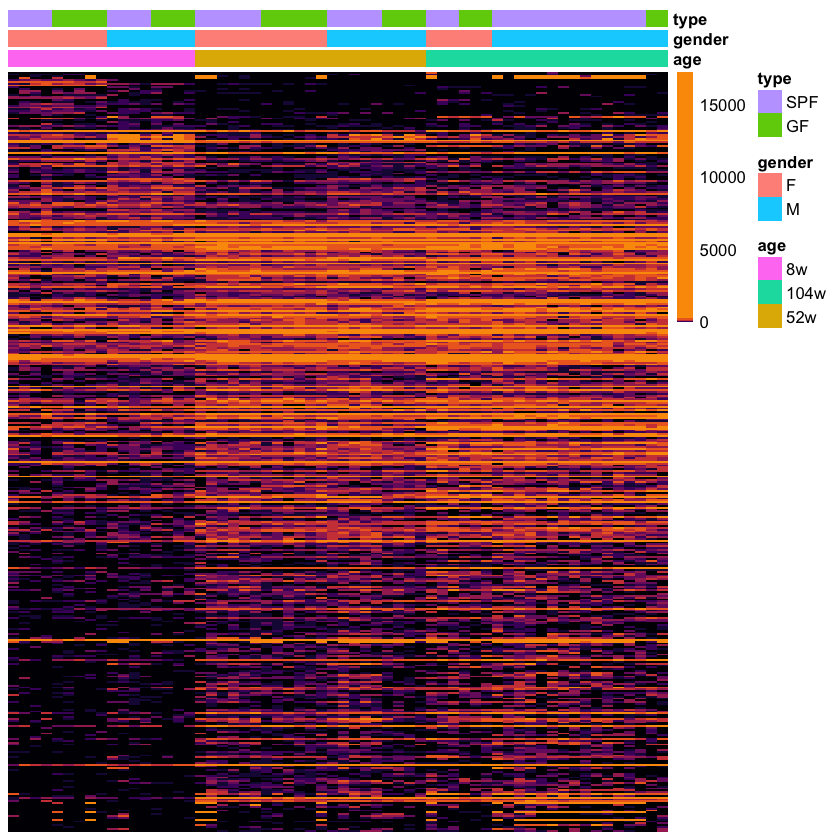

In [15]:
# 52w != 8w with abs(FC) > 2
genes = names((sort(age_deg$fc_deg[which(abs(age_deg$fc_deg[,1])>1),1])))
plot_count_heatmap(genes,samples, annot)

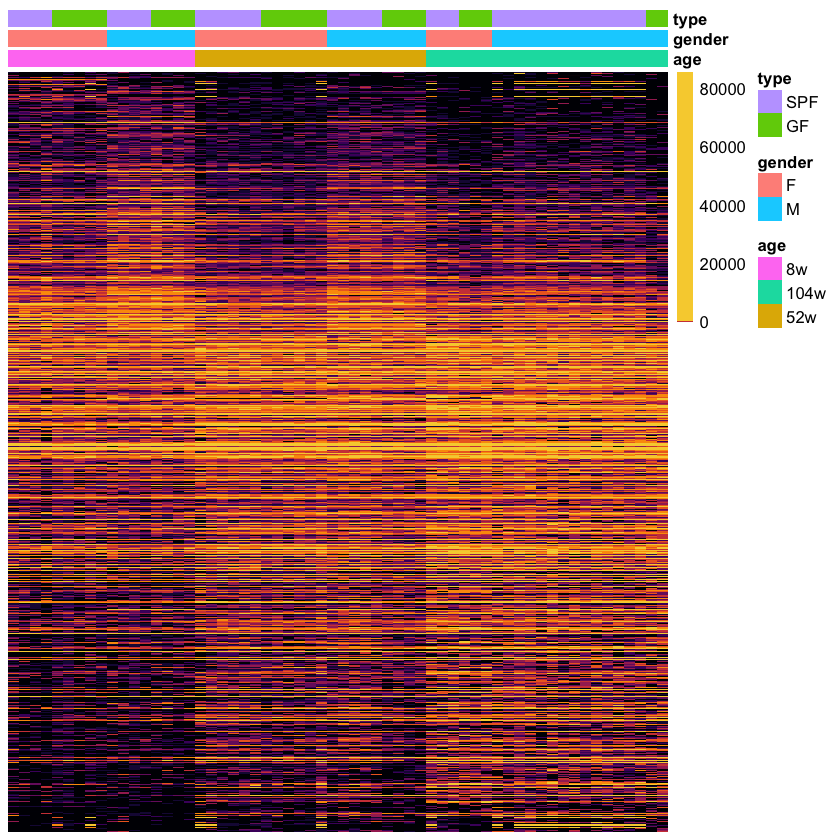

In [16]:
# 104w != 8w with abs(FC) > 2
genes = names((sort(age_deg$fc_deg[which(abs(age_deg$fc_deg[,2])>1),2])))
plot_count_heatmap(genes,samples, annot)

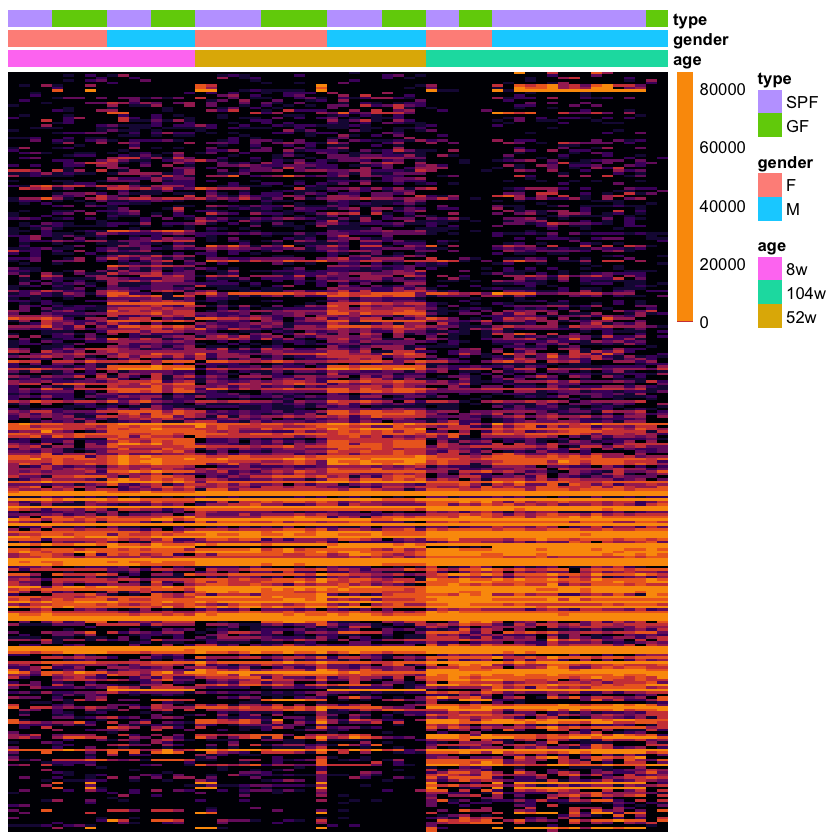

In [17]:
# 104w != 52w with abs(FC) > 2
genes = names((sort(age_deg$fc_deg[which(abs(age_deg$fc_deg[,3])>1),3])))
plot_count_heatmap(genes,samples, annot)

## Compare the numbers

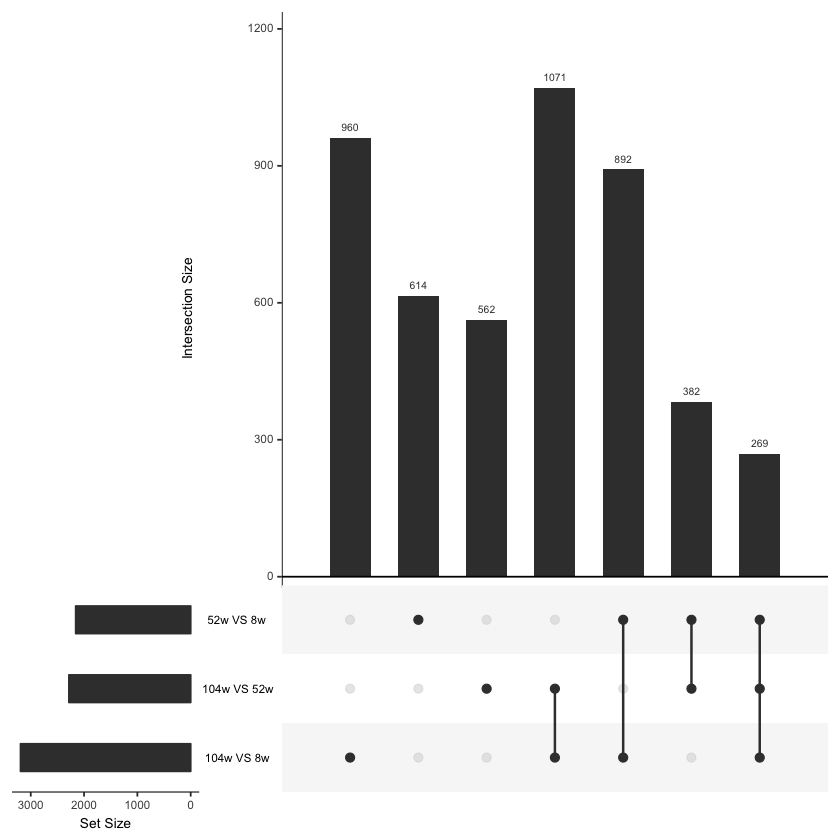

In [18]:
# Differentially expressed genes
upset(as.data.frame(age_deg$deg))

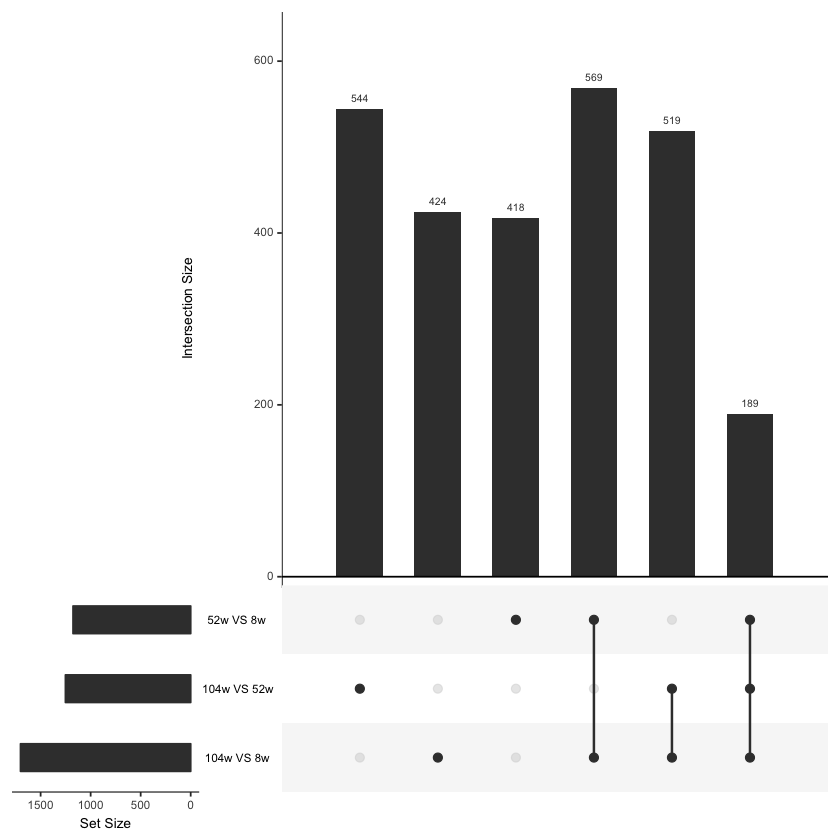

In [19]:
# Differentially more expressed genes
upset(as.data.frame(age_deg$pos))

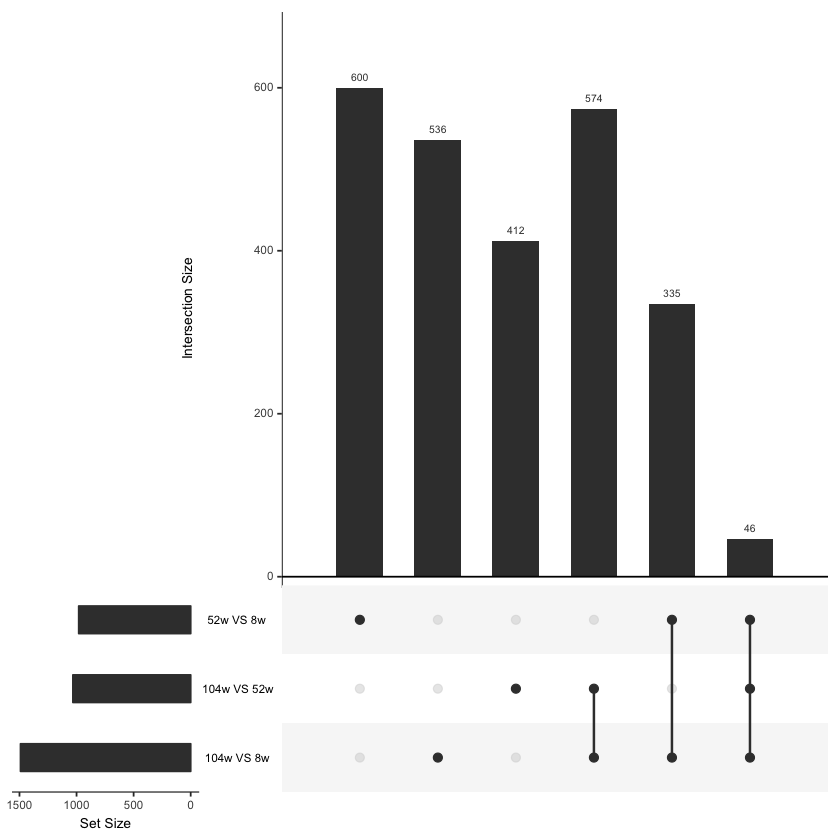

In [20]:
# Differentially less expressed genes
upset(as.data.frame(age_deg$neg))

## Compare the intersections in term of expressions

Warning message in heatmap.2(fc, Colv = NA, scale = "column", cexCol = 0.5, symbreaks = T):
“Discrepancy: Colv is FALSE, while dendrogram is `both'. Omitting column dendogram.”

52w > 8w & 104w > 8w,52w > 8w & 104w < 8w,52w < 8w & 104w > 8w,52w < 8w & 104w < 8w
563,0,0,329


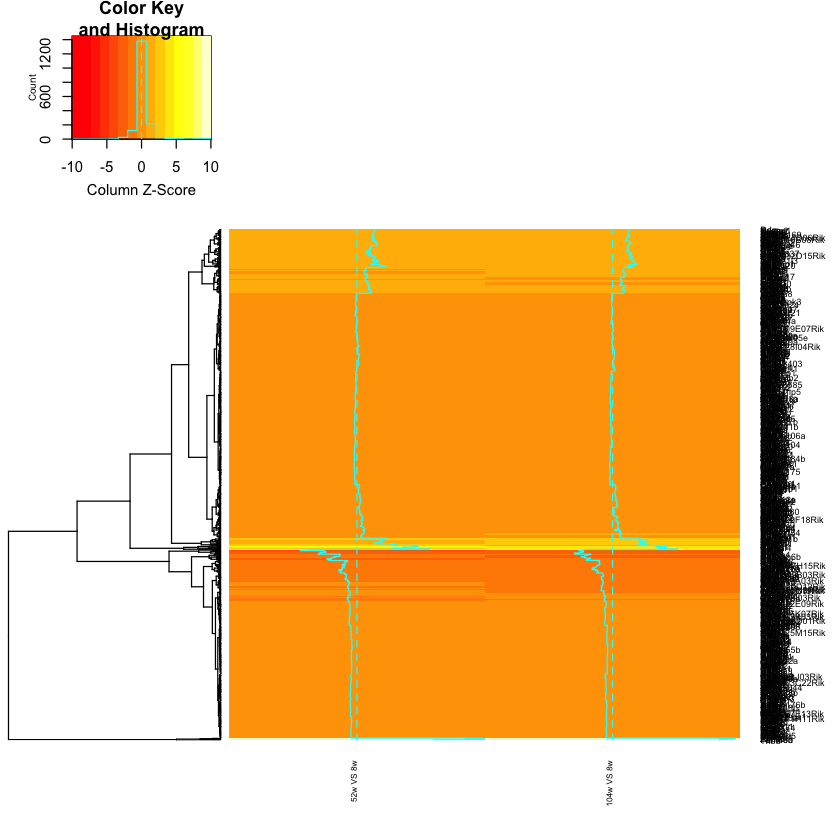

In [21]:
# Genes that are differentially expressed in 52W vs 8W and in 104W vs 8W (and not in 104w vs 52w)
fc = age_deg$fc_deg[!is.na(age_deg$fc_deg[,1]) & !is.na(age_deg$fc_deg[,2]) & is.na(age_deg$fc_deg[,3]),c(1,2)]
heatmap.2(fc, Colv = NA, scale="column", cexCol=0.5, symbreaks=T)
rep = get_repartition(fc)
colnames(rep) = c("52w > 8w & 104w > 8w", "52w > 8w & 104w < 8w", "52w < 8w & 104w > 8w", "52w < 8w & 104w < 8w")
rep

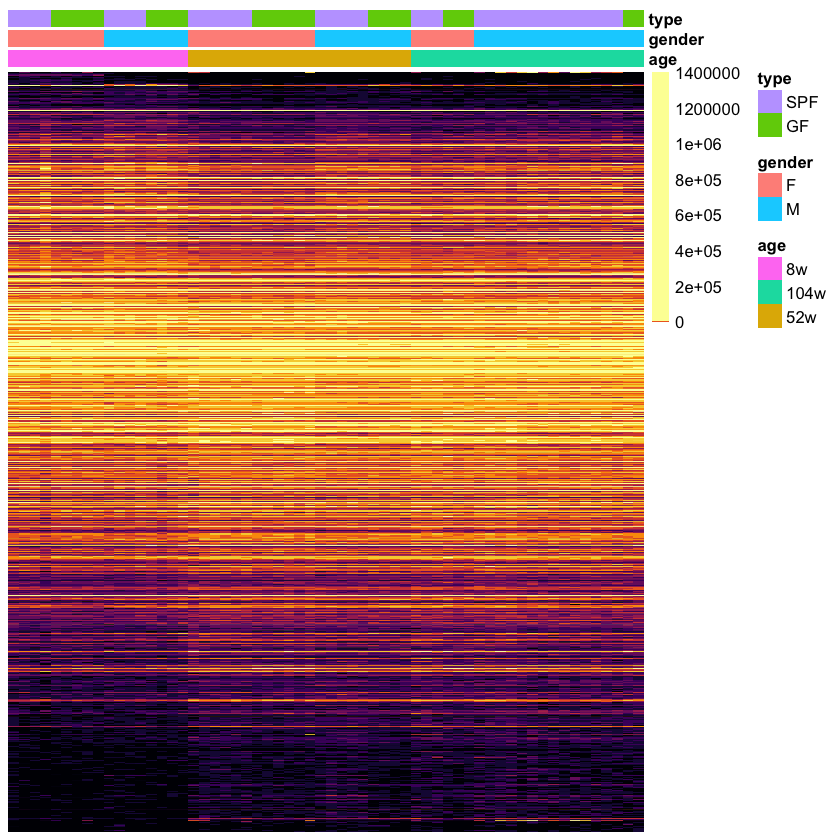

In [22]:
# 52w != 8w and 104w != 8w and 104w == 52w with abs(FC) > 1
genes = names((sort(age_deg$fc_deg[which(abs(age_deg$fc_deg[,1])>0 & abs(age_deg$fc_deg[,2])>0 & is.na(age_deg$fc_deg[,3])),1])))
plot_count_heatmap(genes,samples, annot)

Warning message in heatmap.2(fc, Colv = NA, scale = "column", cexCol = 0.5, symbreaks = T):
“Discrepancy: Colv is FALSE, while dendrogram is `both'. Omitting column dendogram.”

52w > 8w & 104w > 52w,52w > 8w & 104w < 52w,52w < 8w & 104w > 52w,52w < 8w & 104w < 52w
0,107,275,0


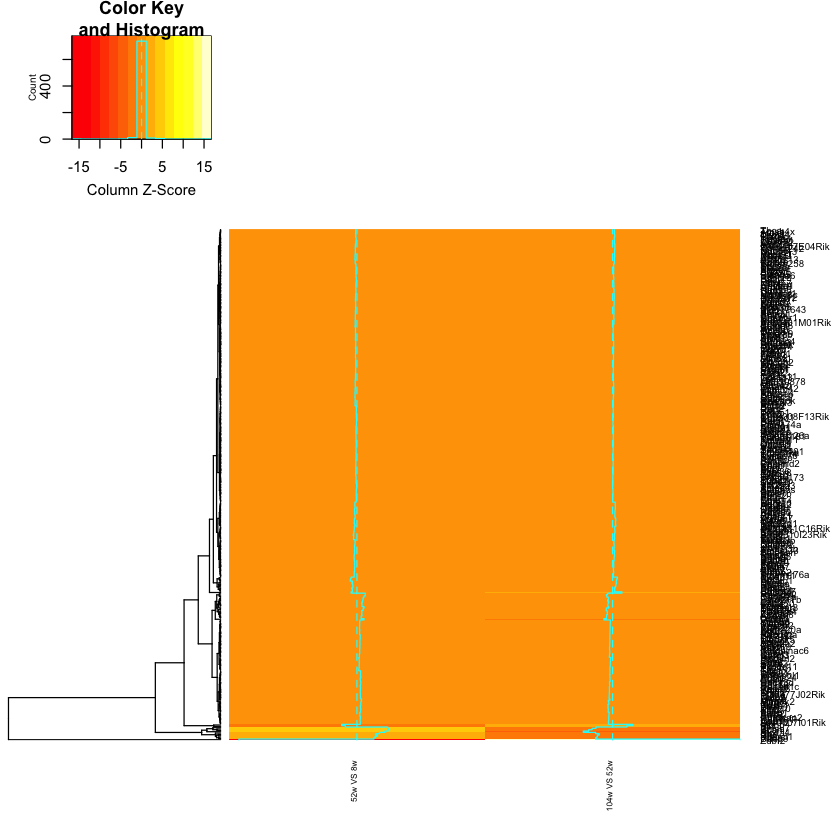

In [23]:
# Genes that are differentially expressed in 52W vs 8W and in 104W vs 52W (and not in 104w vs 52w)
fc = age_deg$fc_deg[!is.na(age_deg$fc_deg[,1]) & is.na(age_deg$fc_deg[,2]) & !is.na(age_deg$fc_deg[,3]),c(1,3)]
heatmap.2(fc, Colv = NA, scale="column", cexCol=0.5, symbreaks=T)
rep = get_repartition(fc)
colnames(rep) = c("52w > 8w & 104w > 52w", "52w > 8w & 104w < 52w", "52w < 8w & 104w > 52w", "52w < 8w & 104w < 52w")
rep

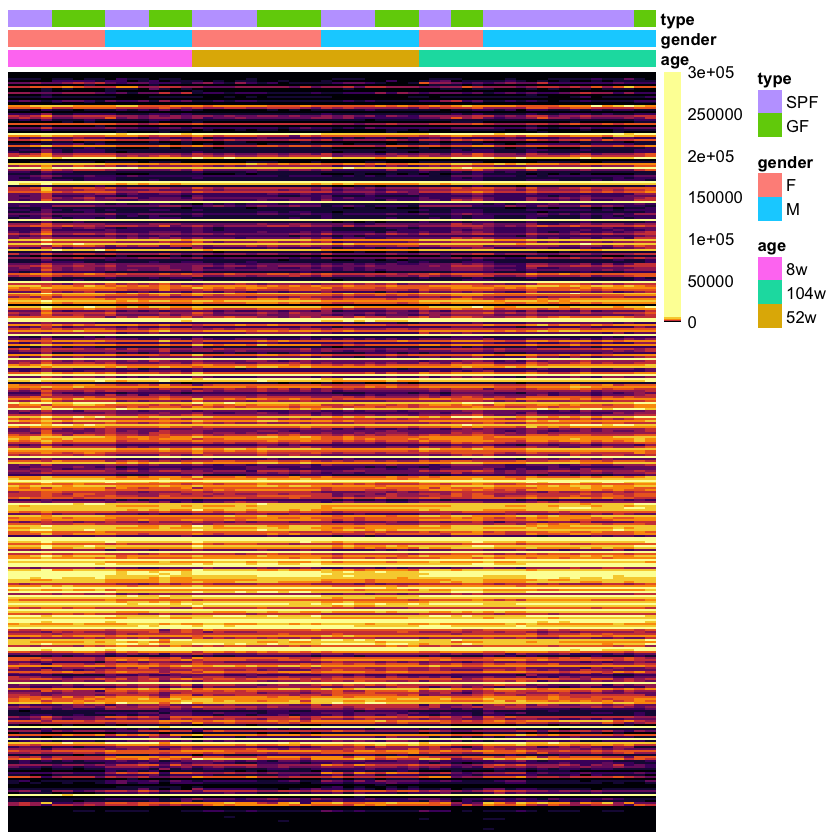

In [24]:
# 52w != 8w and 104w == 8w and 104w != 52w with abs(FC) > 1
genes = names((sort(age_deg$fc_deg[which(abs(age_deg$fc_deg[,1])>0 & is.na(age_deg$fc_deg[,2]) & abs(age_deg$fc_deg[,3])>0),1])))
plot_count_heatmap(genes,samples, annot)

Warning message in heatmap.2(fc, Colv = NA, scale = "column", cexCol = 0.5, symbreaks = T):
“Discrepancy: Colv is FALSE, while dendrogram is `both'. Omitting column dendogram.”

104w > 8w & 104w > 52w,104w > 8w & 104w < 52w,104w < 8w & 104w > 52w,104w < 8w & 104w < 52w
504,0,0,567


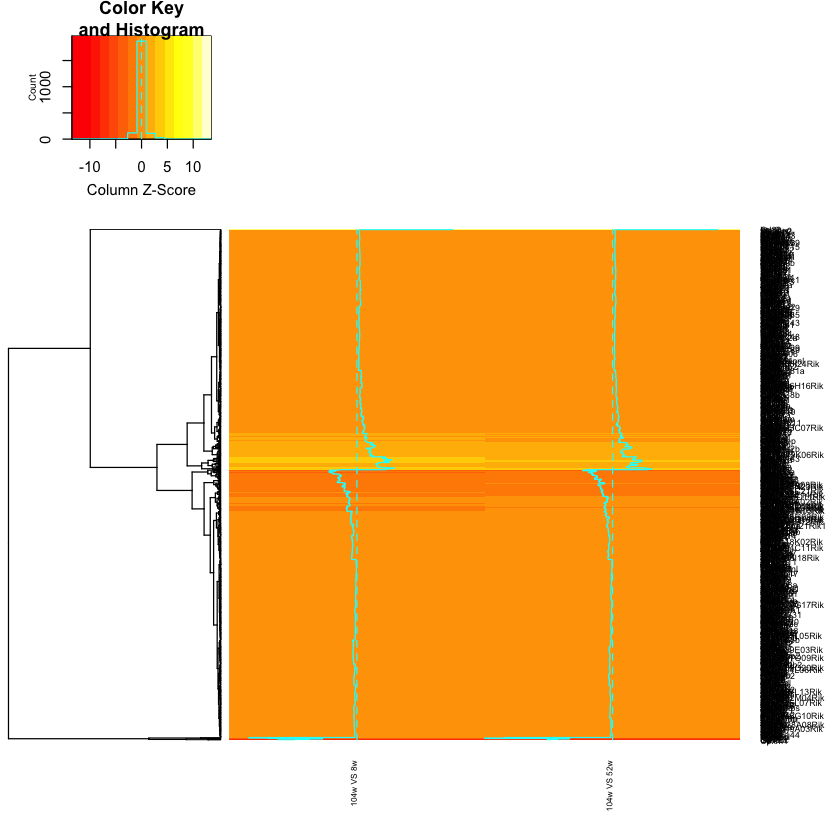

In [25]:
# Genes that are differentially expressed in 104W vs 8W and in 104W vs 52W (and not in 52w vs 8w)
fc = age_deg$fc_deg[is.na(age_deg$fc_deg[,1]) & !is.na(age_deg$fc_deg[,2]) & !is.na(age_deg$fc_deg[,3]),c(2,3)]
heatmap.2(fc, Colv = NA, scale="column", cexCol=0.5, symbreaks=T)
rep = get_repartition(fc)
colnames(rep) = c("104w > 8w & 104w > 52w", "104w > 8w & 104w < 52w", "104w < 8w & 104w > 52w", "104w < 8w & 104w < 52w")
rep

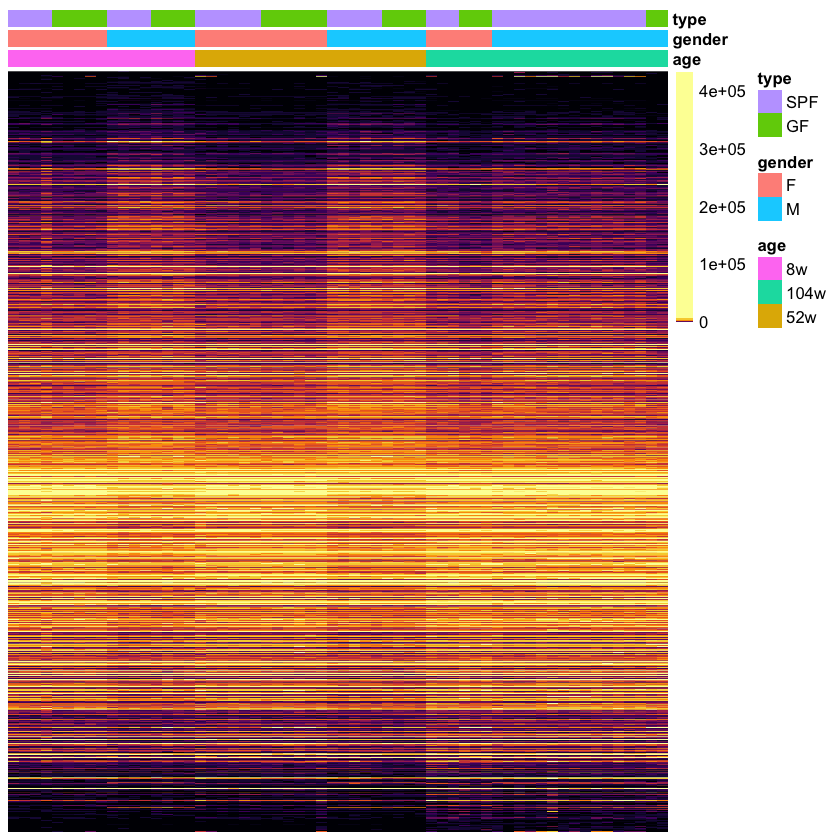

In [26]:
# 52w == 8w and 104w != 8w and 104w != 52w with abs(FC) > 1
genes = names((sort(age_deg$fc_deg[which(is.na(age_deg$fc_deg[,1]) & abs(age_deg$fc_deg[,2])>0 & abs(age_deg$fc_deg[,3])>0),2])))
plot_count_heatmap(genes,samples, annot)

Warning message in heatmap.2(fc, Colv = NA, scale = "column", cexCol = 0.5, symbreaks = T):
“Discrepancy: Colv is FALSE, while dendrogram is `both'. Omitting column dendogram.”

52w > 8w & 104w > 8w & 104w > 52w,52w > 8w & 104w > 8w & 104w < 52w,52w > 8w & 104w < 8w & 104w > 52w,52w > 8w & 104w < 8w & 104w < 52w,52w < 8w & 104w > 8w & 104w > 52w,52w < 8w & 104w > 8w & 104w < 52w,52w < 8w & 104w < 8w & 104w > 52w,52w < 8w & 104w < 8w & 104w < 52w
189,6,0,7,15,0,6,46


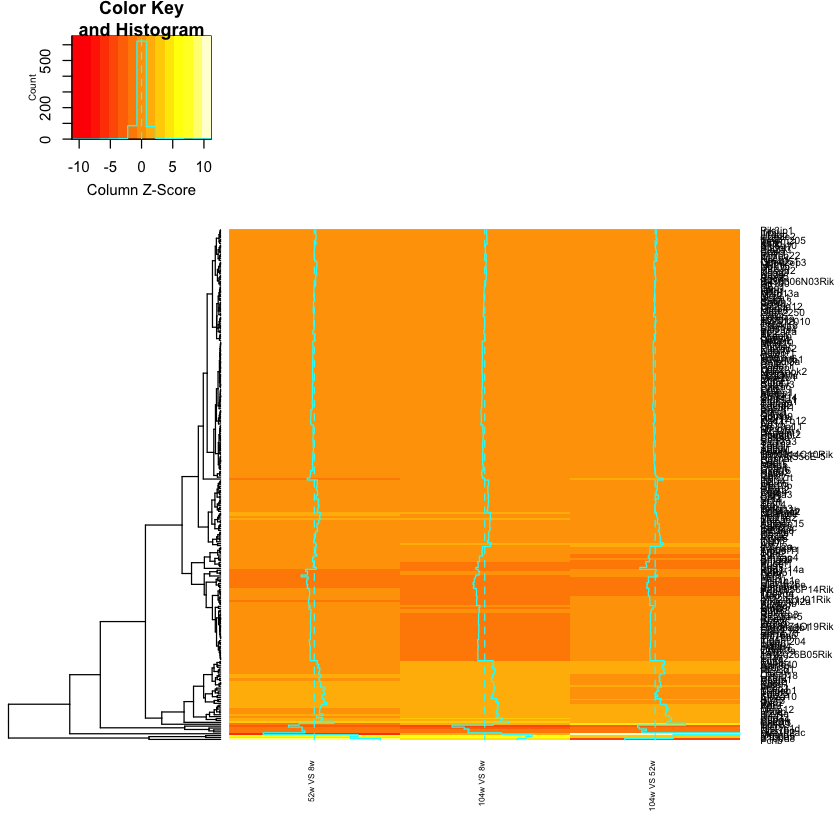

In [27]:
# Genes that are differentially expressed in 52W vs 8W, in 104W vs 8W and in 104W vs 52W
fc = age_deg$fc_deg[!is.na(age_deg$fc_deg[,1]) & !is.na(age_deg$fc_deg[,2]) & !is.na(age_deg$fc_deg[,3]),c(1,2,3)]
heatmap.2(fc, Colv = NA, scale="column", cexCol=0.5, symbreaks=T)
rep = get_repartition_3col(fc)
colnames(rep) = c(
    "52w > 8w & 104w > 8w & 104w > 52w",
    "52w > 8w & 104w > 8w & 104w < 52w",
    "52w > 8w & 104w < 8w & 104w > 52w",
    "52w > 8w & 104w < 8w & 104w < 52w",
    "52w < 8w & 104w > 8w & 104w > 52w",
    "52w < 8w & 104w > 8w & 104w < 52w",
    "52w < 8w & 104w < 8w & 104w > 52w",
    "52w < 8w & 104w < 8w & 104w < 52w")
rep

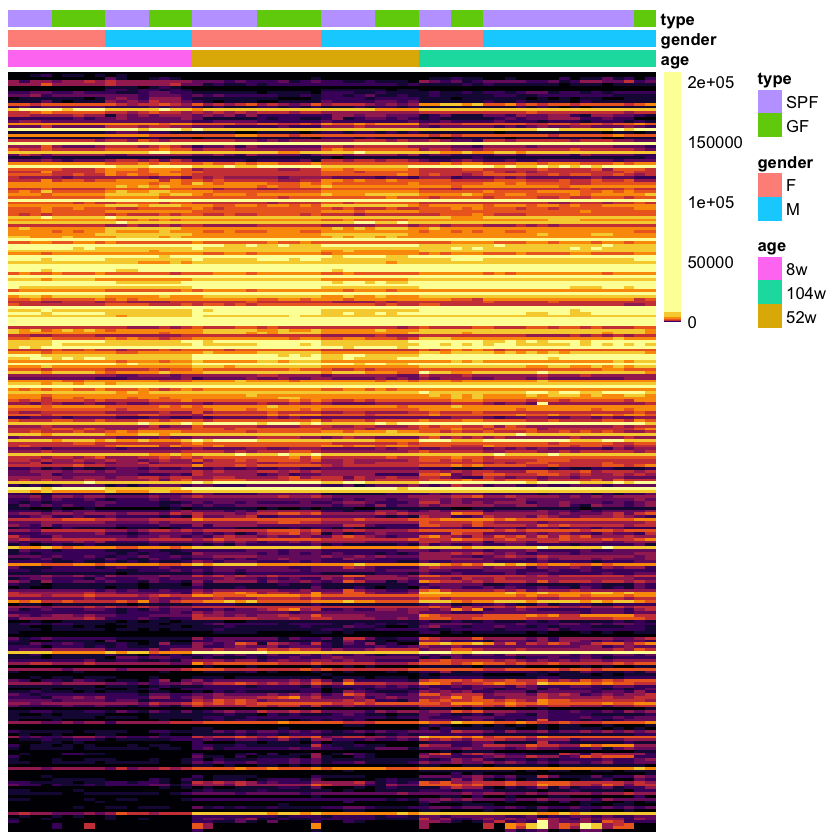

In [28]:
# 52w != 8w and 104w != 8w and 104w != 52w with abs(FC) > 1
genes = names((sort(age_deg$fc_deg[which(abs(age_deg$fc_deg[,1])>0 & abs(age_deg$fc_deg[,2])>0 & abs(age_deg$fc_deg[,3])>0),1])))
plot_count_heatmap(genes,samples, annot)

## DEG into gene co-expression network

- White: up-regulated 
- Black: down-regulated

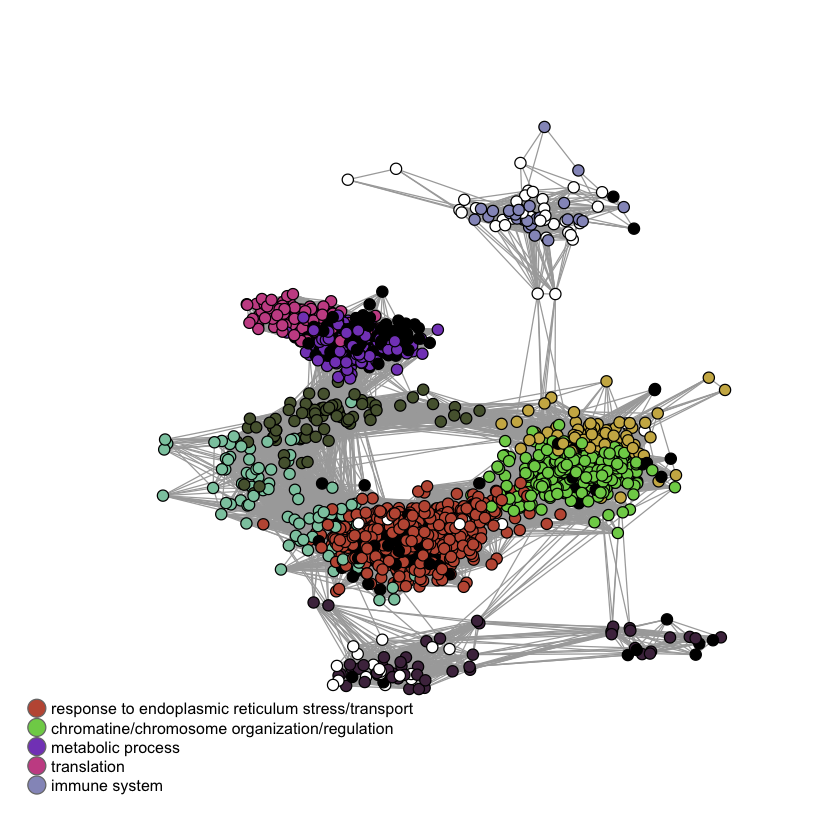

In [75]:
# 52w VS 8w
col_104w_vs_52w = get_deg_colors(age_deg, "104w VS 52w", connected_gene_colors, module_nb) 
plot_net_with_fr_layout(net, col_52w_vs_8w, pal2)

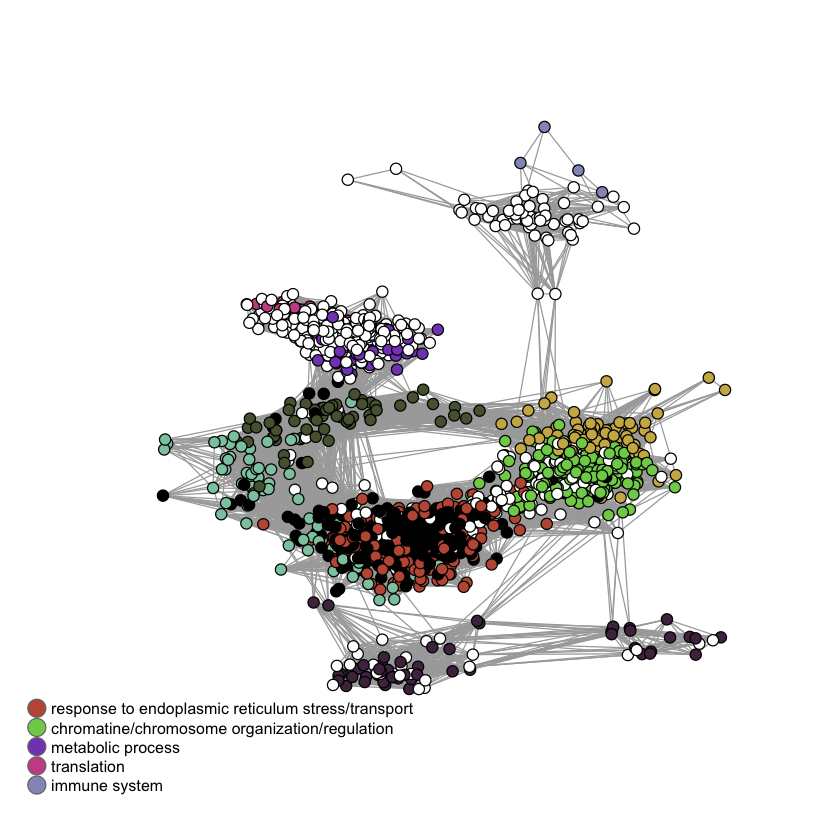

In [76]:
# 104w VS 52w
col_104w_vs_52w = get_deg_colors(age_deg, "104w VS 52w", connected_gene_colors, module_nb) 
plot_net_with_fr_layout(net, col_104w_vs_52w, pal2)

## GO analysis

In [493]:
wall = age_deg$GO_wall
data_type = "under_represented_pvalue"
cat_type = "GO"
pvalue_threshold = 0.05
# 
adj_pvalues = sapply(wall, function(x) p.adjust(x[,data_type], method="BH"))                   
# extract the categories with a significant p-values (over or under represented pvalue)
enriched_cat = which(apply(adj_pvalues <= pvalue_threshold & adj_pvalues > 0, 1, any))                  
# 
adj_pvalues[adj_pvalues > pvalue_threshold] = NA
# extract the category names for the significant categories and merge them for all the comparisons
if(cat_type == "GO"){
    to_extract = c("category","term","ontology")
}else{
    to_extract = c("category")
}
cat = wall[[1]][enriched_cat, to_extract]
adj_pvalues = adj_pvalues[enriched_cat,]
# combine the significant categories for all comparisons
full_mat = t(c(cat, adj_pvalues))
full_mat
                     
get_interesting_cat = function(wall, data_type, cat_type){
    pvalue_threshold = 0.05
    # 
    adj_pvalues = sapply(wall, function(x) p.adjust(x[,data_type], method="BH"))
    # extract the categories with a significant p-values (over or under represented pvalue)
    enriched_cat = which(apply(adj_pvalues <= pvalue_threshold & adj_pvalues > 0, 1, any))
    # 
    adj_pvalues[adj_pvalues > pvalue_threshold] = NA
    # extract the category names for the significant categories and merge them for all the comparisons
    if(cat_type == "GO"){
        to_extract = c("category","term","ontology")
    }else{
        to_extract = c("category")
    }
    cat = wall[[1]][enriched_cat, to_extract]
    # combine the significant categories for all comparisons
    adj_pvalues = adj_pvalues[enriched_cat,]
    if(is.matrix(adj_pvalues)){
        full_mat = cbind(cat, adj_pvalues)
    }else{
        full_mat = t(c(cat, adj_pvalues))
    }
    
    return(full_mat)
}
get_interesting_cat(age_deg$GO_wall,"under_represented_pvalue", "GO")

category,term,ontology,52w VS 8w,104w VS 8w,104w VS 52w
GO:0004081,bis(5'-nucleosyl)-tetraphosphatase (asymmetrical) activity,MF,NA,0.01650171,NA


category,term,ontology,52w VS 8w,104w VS 8w,104w VS 52w
GO:0004081,bis(5'-nucleosyl)-tetraphosphatase (asymmetrical) activity,MF,NA,0.01650171,NA


Dot-plot with the most over-represented BP GO (20 most significant p-values for the different comparison)

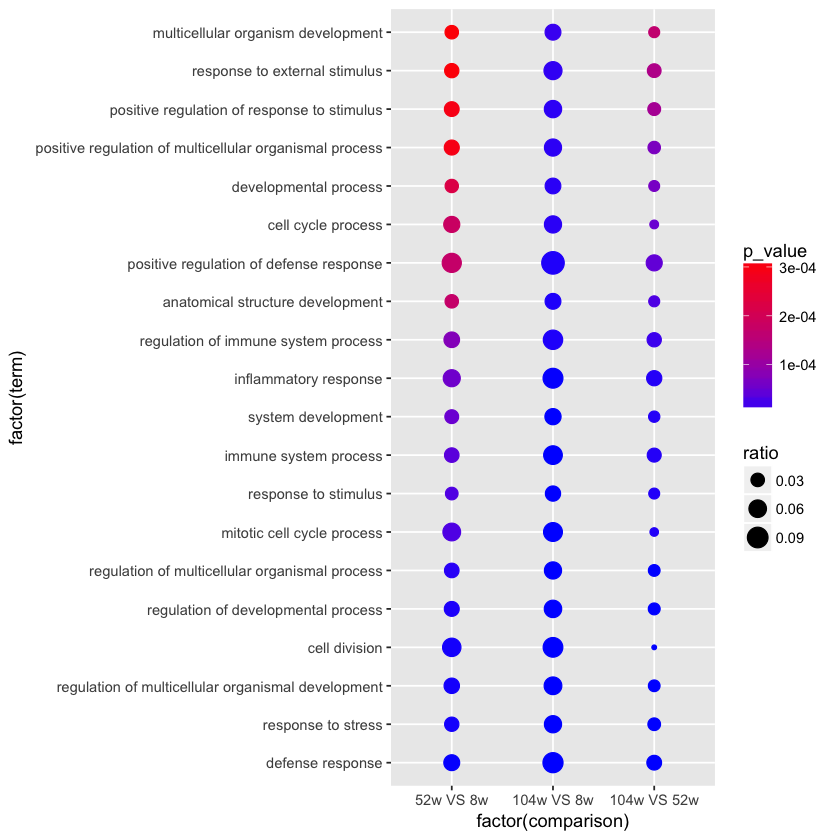

In [498]:
# extract the over-represented GO for BP
over_represented = age_deg$over_represented_GO[age_deg$over_represented_GO$ontology == "BP",c(2,4:6)]
# conserve the top 20 for every comparison
to_conserve = unique(c(get_smallest_value_id(over_represented,"52w VS 8w",20),
                       get_smallest_value_id(over_represented,"104w VS 8w",20),
                       get_smallest_value_id(over_represented,"104w VS 52w",20)))
over_represented = over_represented[to_conserve,]
over_represented = over_represented[order(over_represented[,"52w VS 8w"]),]
# extract the ratios of the conserved GO
ratios = sapply(age_deg$GO_wall, function(x) x[to_conserve,"numDEInCat"]/x[to_conserve,"numInCat"])
# create a matrix for the ggplot
go_over = expand.grid(x = over_represented$term, y = c("52w VS 8w","104w VS 8w","104w VS 52w"))
colnames(go_over) = c("term", "comparison")
go_over$p_value = c(over_represented[, "52w VS 8w"],over_represented[, "104w VS 8w"],over_represented[, "104w VS 52w"])
go_over$ratio = c(ratios[,"52w VS 8w"],ratios[,"104w VS 8w"],ratios[,"104w VS 52w"])
# plot                 
require(ggplot2)
p = ggplot(go_over, aes(factor(comparison), factor(term)))
p + geom_point(aes(size=ratio,col=p_value)) + scale_colour_gradient(low = "blue", high="red")

In [500]:
age_deg$under_represented_GO

category,term,ontology,52w VS 8w,104w VS 8w,104w VS 52w
GO:0004081,bis(5'-nucleosyl)-tetraphosphatase (asymmetrical) activity,MF,NA,0.01650171,NA


In [202]:
MF_GO <- godata('org.Mm.eg.db', ont="MF")
CC_GO <- godata('org.Mm.eg.db', ont="CC")
BP_GO <- godata('org.Mm.eg.db', ont="BP")

preparing gene to GO mapping data...
preparing IC data...
preparing gene to GO mapping data...
preparing IC data...
preparing gene to GO mapping data...
preparing IC data...


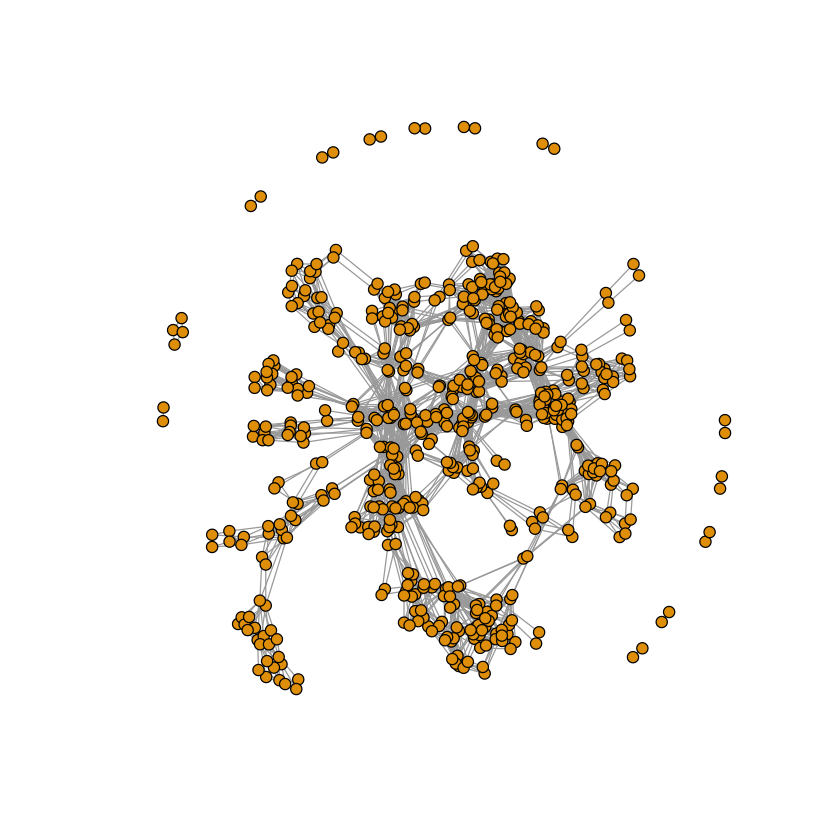

In [508]:
# Get GO term for BP and that are at least once over-represented or under-represented
GO_BP = c(
    age_deg$over_represented_GO[
        age_deg$over_represented_GO[,"ontology"] == "BP" & (!is.na(age_deg$over_represented_GO[,"52w VS 8w"]) | !is.na(age_deg$over_represented_GO[,"104w VS 8w"]) | !is.na(age_deg$over_represented_GO[,"104w VS 52w"])),
        "category"],
    age_deg$under_represented_GO[
        age_deg$under_represented_GO[,"ontology"] == "BP" & (!is.na(age_deg$under_represented_GO[,"52w VS 8w"]) | !is.na(age_deg$under_represented_GO[,"104w VS 8w"]) | !is.na(age_deg$under_represented_GO[,"104w VS 52w"])),
        "category"])
# Get similarity between GO terms
GO_BP_sim = mgoSim(GO_BP, GO_BP, semData=BP_GO, measure="Wang", combine=NULL)
# Extract adjency matrix by keeping only the distance > 0.5
GO_BP_sim = (GO_BP_sim > 0.5)*1
# Build the network
GO_BP_net = graph_from_incidence_matrix(GO_BP_sim,
                                        directed = FALSE,
                                        weighted = TRUE)
GO_BP_net_layout = layout_with_fr(GO_BP_net)
plot(GO_BP_net, 
     vertex.label=NA,
     vertex.size=4,
     layout=GO_BP_net_layout)

In [510]:
over_represented_BP = age_deg$over_represented_GO[age_deg$over_represented_GO$ontology == "BP",c(1,4:6)]
under_represented_BP = age_deg$under_represented_GO[age_deg$under_represented_GO$ontology == "BP",c(1,4:6)]

In [475]:
get_interesting_cat(age_deg$GO_wall, "under_represented_pvalue", "GO")              

Warning message in data.frame(..., check.names = FALSE):
“row names were found from a short variable and have been discarded”

category,term,ontology,"adj_pvalues[enriched_cat, ]"
GO:0004081,bis(5'-nucleosyl)-tetraphosphatase (asymmetrical) activity,MF,NA
GO:0004081,bis(5'-nucleosyl)-tetraphosphatase (asymmetrical) activity,MF,0.01650171
GO:0004081,bis(5'-nucleosyl)-tetraphosphatase (asymmetrical) activity,MF,NA


In [448]:
over_represented = over_represented_BP
over_repr_all_values = unlist(c(over_represented[,2:dim(over_represented)[2]]))
over_repr_all_values = over_repr_all_values[!is.na(over_repr_all_values)]
over_repr_all_values_ii = cut(over_repr_all_values,
         breaks = seq(min(over_repr_all_values), 0.05, len = 100),
         include.lowest = TRUE)
over_repr_colors = cbind(sort(over_repr_all_values), colorRampPalette(c("red", "white"))(99)[over_repr_all_values_ii])
min(over_repr_all_values)
log10(min(over_repr_all_values))
log10(0.05)
exp(log(10)*seq(log10(min(all_values)),log10(0.05),len = 100))

[1] 2.030475e-14

[1] -13.6924

[1] -1.30103

[1] 2.030475e-14 2.708714e-14 3.613504e-14 4.820520e-14 6.430715e-14
  [6] 8.578762e-14 1.144432e-13 1.526706e-13 2.036670e-13 2.716978e-13
 [11] 3.624528e-13 4.835227e-13 6.450335e-13 8.604936e-13 1.147924e-12
 [16] 1.531364e-12 2.042884e-12 2.725267e-12 3.635587e-12 4.849979e-12
 [21] 6.470015e-12 8.631189e-12 1.151426e-11 1.536036e-11 2.049117e-11
 [26] 2.733582e-11 3.646679e-11 4.864777e-11 6.489755e-11 8.657523e-11
 [31] 1.154939e-10 1.540722e-10 2.055369e-10 2.741922e-10 3.657805e-10
 [36] 4.879619e-10 6.509555e-10 8.683937e-10 1.158463e-09 1.545423e-09
 [41] 2.061640e-09 2.750288e-09 3.668965e-09 4.894507e-09 6.529415e-09
 [46] 8.710432e-09 1.161997e-08 1.550138e-08 2.067930e-08 2.758679e-08
 [51] 3.680159e-08 4.909440e-08 6.549337e-08 8.737007e-08 1.165542e-07
 [56] 1.554868e-07 2.074239e-07 2.767096e-07 3.691387e-07 4.924418e-07
 [61] 6.569319e-07 8.763664e-07 1.169098e-06 1.559612e-06 2.080568e-06
 [66] 2.775538e-06 3.702649e-06 4.939443e-06 6.589361e-06 8.790401e-06
 [71] 1.172665e-05 1.564370e-05 2.086915e-05 2.784006e-05 3.713946e-05
 [76] 4.954513e-05 6.609466e-05 8.817221e-05 1.176243e-04 1.569143e-04
 [81] 2.093283e-04 2.792500e-04 3.725277e-04 4.969629e-04 6.629631e-04
 [86] 8.844122e-04 1.179832e-03 1.573930e-03 2.099669e-03 2.801020e-03
 [91] 3.736643e-03 4.984791e-03 6.649858e-03 8.871106e-03 1.183431e-02
 [96] 1.578732e-02 2.106075e-02 2.809566e-02 3.748044e-02 5.000000e-02

In [523]:
over_represented = over_represented_BP
under_represented = under_represented_BP
comp = "52w VS 8w"
all_GO = GO_BP

get_col_ramp = function(values, min_col, max_col){
    if(dim(values)[1] == 0){
        return(c())
    }else{
        all_values = unlist(c(values[,2:dim(values)[2]]))
        all_values = all_values[!is.na(all_values)]
        ii = cut(all_values,
            breaks = exp(log(10)*seq(log10(min(all_values)),log10(0.05),len = 100)),
            include.lowest = TRUE)
        colors = cbind(sort(all_values), colorRampPalette(c(min_col, max_col))(99)[ii])
        return(colors)
    }
}
over_repr_colors = get_col_ramp(over_represented, "red", "white")
under_repr_colors = get_col_ramp(under_represented, "blue", "white")

over_represented_GO = over_represented[!is.na(over_represented[,comp]),1]
under_represented_GO = under_represented[!is.na(under_represented[,comp]),1]
    
col = rep("white", length(all_GO))
names(col) = all_GO

val = over_represented[names(col) %in% over_represented_GO,comp]
col[names(col) %in% over_represented_GO] = sapply(val, function(i) return(over_repr_colors[which(over_repr_colors[,1] == i)[1],2]))

val = over_represented[names(col) %in% under_represented_GO,comp]
col[names(col) %in% under_represented_GO] = sapply(val, function(i) return(under_repr_colors[which(under_repr_colors[,1] == i)[1],2]))

col = unlist(col)
                        
head(over_represented)
head(col)
over_repr_colors
                                                   

,category,52w VS 8w,104w VS 8w,104w VS 52w
3585,GO:0006952,8.076300e-07,2.030475e-14,2.153992e-09
3584,GO:0006950,2.700175e-06,8.998368e-12,6.564623e-08
21276,GO:2000026,2.700175e-06,4.666009e-11,7.755858e-08
13940,GO:0051301,2.700175e-06,4.666009e-11,1.191039e-07
13599,GO:0050793,4.986808e-06,2.121943e-10,1.192296e-07
13894,GO:0051239,8.347811e-06,1.231998e-09,1.261168e-07


GO:0006952 GO:0006950 GO:2000026 GO:0051301 GO:0050793 GO:0051239 
 "#FFD2D2"  "#FFD2D2"  "#FFD2D2"  "#FFD2D2"  "#FFD2D2"  "#FFDADA"

104w VS 8w1,2.03047538612091e-14,#FF9C9C
104w VS 8w2,8.99836805944431e-12,#FFA6A6
104w VS 8w3,4.66600883376954e-11,#FFA6A6
104w VS 8w4,4.66600883376954e-11,#FFA6A6
104w VS 8w5,2.12194267605727e-10,#FFAEAE
104w VS 8w6,1.23199764935258e-09,#FFB0B0
104w VS 52w1,2.15399203053327e-09,#FFBBBB
104w VS 8w7,1.11253986363311e-08,#FFBDBD
104w VS 8w8,2.79385438599352e-08,#FFBDBD
104w VS 8w9,3.78103947665228e-08,#FFC0C0
104w VS 8w10,6.53982886344158e-08,#FFC3C3


In [531]:
over_represented_GO = over_represented[!is.na(over_represented[,comp]),1]
length(over_represented_GO)

[1] 178

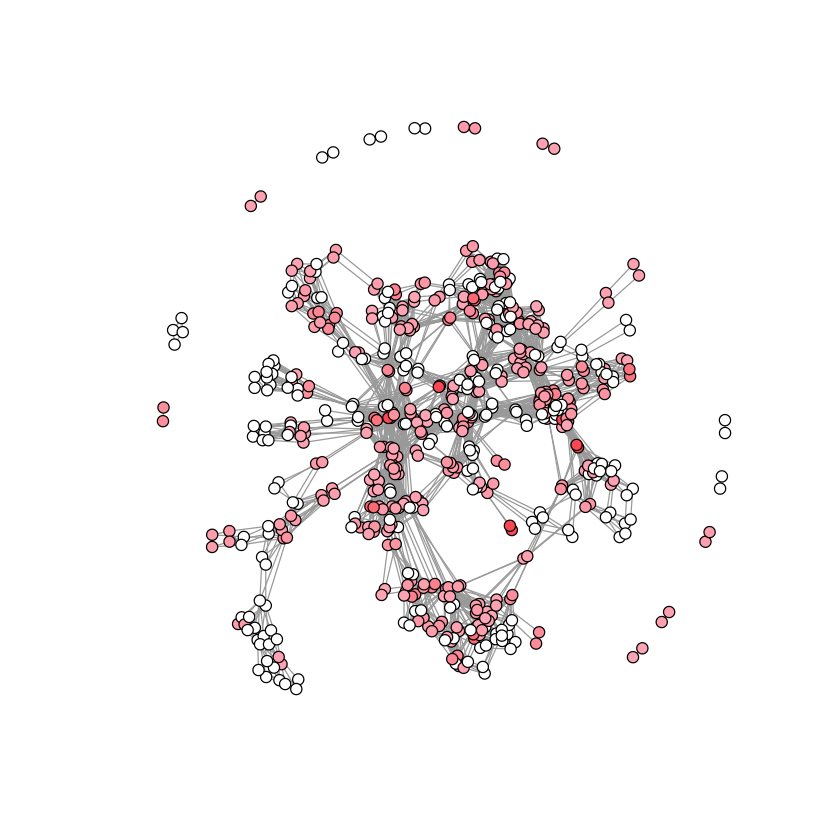

In [537]:
# 52w VS 8w
col = get_GO_network_col(over_represented_BP, under_represented_BP, "52w VS 8w", GO_BP)
# plot network
plot(GO_BP_net, 
     vertex.label=NA,
     vertex.size=4,
     vertex.color=col,
     layout=GO_BP_net_layout)

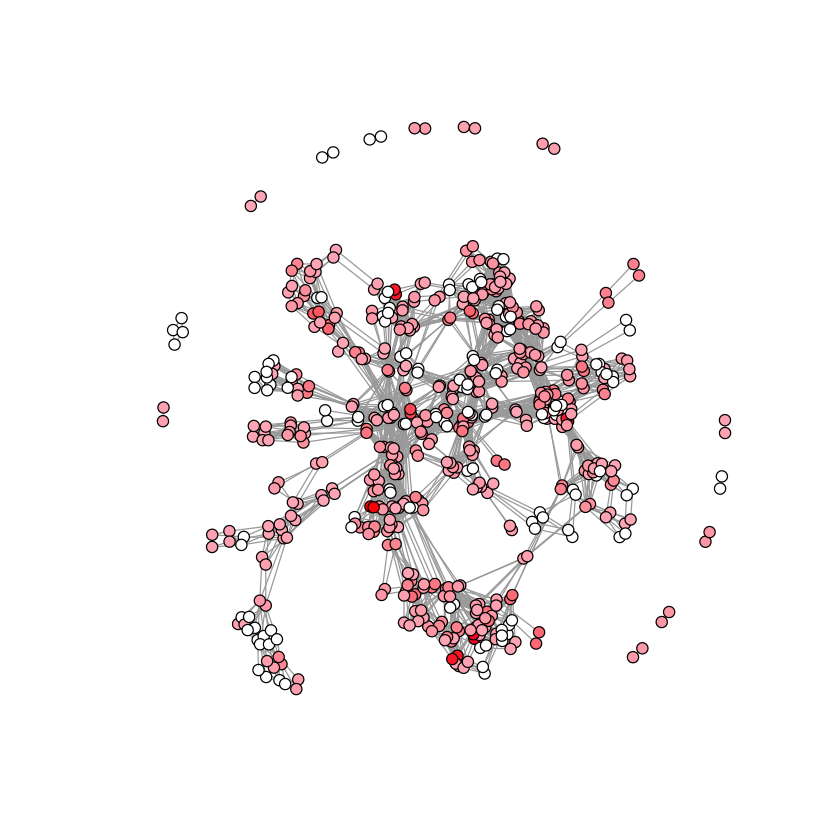

In [538]:
# 104w vs 52w
col = get_GO_network_col(over_represented_BP, under_represented_BP, "104w VS 52w", GO_BP)
# plot network
plot(GO_BP_net, 
     vertex.label=NA,
     vertex.size=4,
     vertex.color=col,
     layout=GO_BP_net_layout)

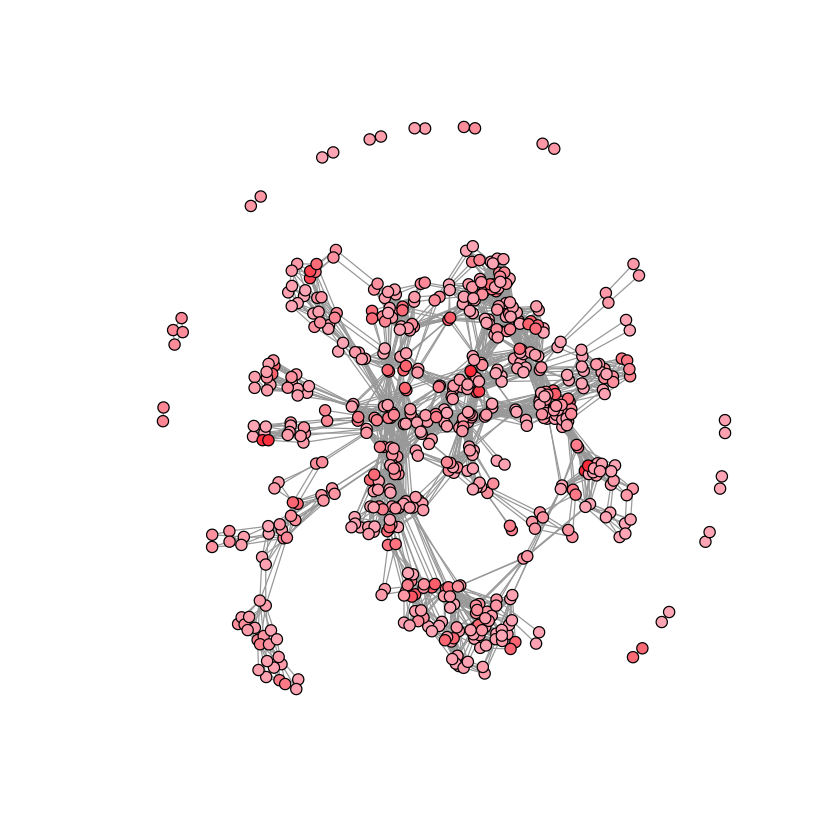

In [539]:
# 104w vs 8w
col = get_GO_network_col(over_represented_BP, under_represented_BP, "104w VS 8w", GO_BP)
# plot network
plot(GO_BP_net, 
     vertex.label=NA,
     vertex.size=4,
     vertex.color=col,
     layout=GO_BP_net_layout)

# Comparison between the ages for the types (after controlling for gender)

Questions

- What are the differences between the ages for the different types
- Do we observe the same changes as globally?

In [ ]:
age_type_data = list(SPF_52w_8w, GF_52w_8w, SPF_104w_8w, GF_104w_8w, SPF_104w_52w, GF_104w_52w)
names(age_type_data) = c("52w VS 8w (SPF)", "52w VS 8w (GF)", "104w VS 8w (SPF)", "104w VS 8w (GF)", "104w VS 52w (SPF)", "104w VS 52w (GF)")
age_type_deg = extract_diff_expr_genes(age_type_data, "age_type_data")

In [ ]:
SPF_samples = c(
    'SPF_8w_F_1_2','SPF_8w_F_3_2','SPF_8w_F_4_2','SPF_8w_F_5_2','SPF_8w_M_1_2','SPF_8w_M_2_2','SPF_8w_M_3_2','SPF_8w_M_4_2',
    'SPF_52w_F_1_2','SPF_52w_F_2_2','SPF_52w_F_3_2','SPF_52w_F_4_2','SPF_52w_F_5_2','SPF_52w_F_6_2','SPF_52w_M_1_2','SPF_52w_M_2_2','SPF_52w_M_3_2','SPF_52w_M_4_2','SPF_52w_M_5_2',
    'SPF_104w_F_1_2','SPF_104w_F_2_2','SPF_104w_F_3_2','SPF_104w_M_1_2','SPF_104w_M_2_2','SPF_104w_M_3_2','SPF_104w_M_4_2','SPF_104w_M_5_2','SPF_104w_M_6_2','SPF_104w_M_7_2','SPF_104w_M_8_2','SPF_104w_M_9_2','SPF_104w_M_10_2','SPF_104w_M_11_2','SPF_104w_M_12_2','SPF_104w_M_13_2','SPF_104w_M_14_2')
GF_samples = c(
    'GF_8w_F_1_2','GF_8w_F_2_2','GF_8w_F_3_2','GF_8w_F_4_2','GF_8w_F_5_2','GF_8w_M_1_2','GF_8w_M_2_2','GF_8w_M_3_2','GF_8w_M_4_2',
    'GF_52w_F_1_2','GF_52w_F_2_2','GF_52w_F_3_2','GF_52w_F_4_2','GF_52w_F_5_2','GF_52w_F_6_2','GF_52w_M_1_2','GF_52w_M_2_2','GF_52w_M_3_2','GF_52w_M_4_2',
    'GF_104w_F_1_2','GF_104w_F_2_2','GF_104w_F_3_2','GF_104w_M_1_2','GF_104w_M_2_2')
annot = as.data.frame(colData(dge)[, c("age", "gender")])

## Counts

In [ ]:
# 52w != 8w or 104w != 8w or 104w != 52w for SPF with abs(FC) > 2
genes = names((sort(age_type_deg$fc_deg[which(abs(age_type_deg$fc_deg[,1])>1 | abs(age_type_deg$fc_deg[,3])>1 | abs(age_type_deg$fc_deg[,5])>1),1])))
plot_count_heatmap(genes,SPF_samples, annot)

In [ ]:
# 52w != 8w or 104w != 8w or 104w != 52w for GF with abs(FC) > 2
genes = names((sort(age_type_deg$fc_deg[which(abs(age_type_deg$fc_deg[,2])>1 | abs(age_type_deg$fc_deg[,4])>1 | abs(age_type_deg$fc_deg[,6])>1),2])))
plot_count_heatmap(genes,GF_samples, annot)

## Comparison of the numbers per types

In [ ]:
# Differentially expressed genes
upset(as.data.frame(age_type_deg$deg),nsets = 6)

In [ ]:
# Differentially more expressed genes
upset(as.data.frame(age_type_deg$pos),nsets = 6)

In [ ]:
# Differentially less expressed genes
upset(as.data.frame(age_type_deg$neg),nsets = 6)

## Comparison with the global numbers

### 52w vs 8w

In [ ]:
# 52w vs 8w
type_data_52w_8w = list(SPF_52w_8w, GF_52w_8w, global_52w_8w)
names(type_data_52w_8w) = c("52w VS 8w (SPF)", "52w VS 8w (GF)", "52w VS 8w (global)")
type_deg_52w_8w = extract_diff_expr_genes(type_data_52w_8w, "type_data_52w_8w")

In [ ]:
# Differentially expressed genes
upset(as.data.frame(type_deg_52w_8w$deg))

### 104w vs 8w

In [ ]:
type_data_104w_8w = list(SPF_104w_8w, GF_104w_8w, global_104w_8w)
names(type_data_104w_8w) = c("104w VS 8w (SPF)", "104w VS 8w (GF)", "104w VS 8w (global)")
type_deg_104w_8w = extract_diff_expr_genes(type_data_104w_8w, "type_data_104w_8w")

In [ ]:
# Differentially expressed genes
upset(as.data.frame(type_deg_104w_8w$deg))

### 104w vs 52w

In [ ]:
type_data_104w_52w = list(SPF_104w_52w, GF_104w_52w, global_104w_52w)
names(type_data_104w_52w) = c("104w VS 52w (SPF)", "104w VS 52w (GF)", "104w VS 52w (global)")
type_deg_104w_52w = extract_diff_expr_genes(type_data_104w_52w, "type_data_104w_52w")

In [ ]:
# Differentially expressed genes
upset(as.data.frame(type_deg_104w_52w$deg))

## SPF effect in aging

Question: Is there any genes that shows an increasing fold change in SPF with aging while not for GF?

| 52w vs 8w for SPF | 52w vs 8w for GF | 104w vs 52w for SPF | 104w vs 52w for GF | Gene number
--- | --- | --- | --- | --- | ---
Set 1 | != |  | != |  | 244
Set 2 | != | == | != | == | 92 


In [ ]:
# set extractions
set1 = rownames(age_type_deg$fc_deg[!is.na(age_type_deg$fc_deg[,1]) & !is.na(age_type_deg$fc_deg[,5]),])
set2 = rownames(age_type_deg$fc_deg[!is.na(age_type_deg$fc_deg[,1]) & is.na(age_type_deg$fc_deg[,2]) & !is.na(age_type_deg$fc_deg[,5]) & is.na(age_type_deg$fc_deg[,6]),])
# gene numbers
res = matrix(0,ncol = 1, nrow=2, dimnames=list(c("Set 1", "Set 2"),c("Gene number")))
res[1,1] = length(set1)
res[2,1] = length(set2)
res
# log2FC
set1_fc = age_type_deg$fc_deg[set1,]
set1_fc[is.na(set1_fc)] = 0
set2_fc = age_type_deg$fc_deg[set2,]
set2_fc[is.na(set2_fc)] = 0

In [ ]:
# plots of the differences
plot(set1_fc[,"52w VS 8w (SPF)"], set1_fc[,"104w VS 52w (SPF)"], xlab = "Log2FC for 52w vs 8w (SPF)", ylab= "Log2FC for 104w vs 52w (SPF)", pch = 20, col = rgb(0,0,1,alpha=0.5))
points(set2_fc[,"52w VS 8w (SPF)"], set2_fc[,"104w VS 52w (SPF)"], pch = 20, col = rgb(1,0,0,alpha=0.5))
legend("topright", pch = 20, col = c(rgb(0,0,1,alpha=0.5),rgb(1,0,0,alpha=0.5)), legend=c("Changing in SPF", "Changing in SPF but not in GF"), cex = 0.7)
abline(h = 0, col = rgb(0,0,0,alpha=0.1))
abline(v = 0, col = rgb(0,0,0,alpha=0.1))

### Genes with differential expression with aging in SPF but not in GF

In [ ]:
aging_SPF_diff = cbind(set2_fc[,"52w VS 8w (SPF)"], set2_fc[,"104w VS 52w (SPF)"])
colnames(aging_SPF_diff) = c("52w VS 8w (SPF)","104w VS 52w (SPF)")

In [ ]:
# 52w VS 8w (SPF) > 0 and 104w VS 52w (SPF) > 0
pos_1_pos_2 = aging_SPF_diff[aging_SPF_diff[,"52w VS 8w (SPF)"]>0 & aging_SPF_diff[,"104w VS 52w (SPF)"]>0,]
investigate_gene_set(pos_1_pos_2)
plot(pos_1_pos_2, col = rgb(1,0,0,alpha=0.5), pch = 19, xlab = "Log2FC for 52w vs 8w (SPF)", ylab= "Log2FC for 104w vs 52w (SPF)")

In [ ]:
# 52w VS 8w (SPF) > 0 and 104w VS 52w (SPF) < 0
pos_1_neg_2 = aging_SPF_diff[aging_SPF_diff[,"52w VS 8w (SPF)"]>0 & aging_SPF_diff[,"104w VS 52w (SPF)"]<0,]
investigate_gene_set(pos_1_neg_2)
plot(pos_1_neg_2, col = rgb(1,0,0,alpha=0.5), pch = 19, xlab = "Log2FC for 52w vs 8w (SPF)", ylab= "Log2FC for 104w vs 52w (SPF)")

In [ ]:
# 52w VS 8w (SPF) < 0 and 104w VS 52w (SPF) > 0
neg_1_pos_2 = aging_SPF_diff[aging_SPF_diff[,"52w VS 8w (SPF)"]<0 & aging_SPF_diff[,"104w VS 52w (SPF)"]>0,]
investigate_gene_set(neg_1_pos_2)
plot(neg_1_pos_2, col = rgb(1,0,0,alpha=0.5), pch = 19, xlab = "Log2FC for 52w vs 8w (SPF)", ylab= "Log2FC for 104w vs 52w (SPF)")

In [ ]:
# 52w VS 8w (SPF) < 0 and 104w VS 52w (SPF) < 0
neg_1_neg_2 = aging_SPF_diff[aging_SPF_diff[,"52w VS 8w (SPF)"]<0 & aging_SPF_diff[,"104w VS 52w (SPF)"]<0,]
investigate_gene_set(neg_1_neg_2)
plot(neg_1_neg_2, col = rgb(1,0,0,alpha=0.5), pch = 19, xlab = "Log2FC for 52w vs 8w (SPF)", ylab= "Log2FC for 104w vs 52w (SPF)")

![](../results/dge/img/male_delayed_genes.png)

# Comparison between the ages for the genders (after controlling for type)

Questions

- What are the differences between the ages for the different genders?
- Do we observe the same changes as globally?

In [ ]:
age_gender_data = list(F_52w_8w, M_52w_8w, F_104w_8w, M_104w_8w, F_104w_52w, M_104w_52w)
names(age_gender_data) = c("52w VS 8w (F)", "52w VS 8w (M)", "104w VS 8w (F)", "104w VS 8w (M)", "104w VS 52w (F)", "104w VS 52w (M)")
age_gender_deg = extract_diff_expr_genes(age_gender_data, "age_gender_data")

In [ ]:
M_samples = c(
    'SPF_8w_M_1_2','SPF_8w_M_2_2','SPF_8w_M_3_2','SPF_8w_M_4_2','GF_8w_M_1_2','GF_8w_M_2_2','GF_8w_M_3_2','GF_8w_M_4_2',
    'SPF_52w_M_1_2','SPF_52w_M_2_2','SPF_52w_M_3_2','SPF_52w_M_4_2','SPF_52w_M_5_2','GF_52w_M_1_2','GF_52w_M_2_2','GF_52w_M_3_2','GF_52w_M_4_2',
    'SPF_104w_M_1_2','SPF_104w_M_2_2','SPF_104w_M_3_2','SPF_104w_M_4_2','SPF_104w_M_5_2','SPF_104w_M_6_2','SPF_104w_M_7_2','SPF_104w_M_8_2','SPF_104w_M_9_2','SPF_104w_M_10_2','SPF_104w_M_11_2','SPF_104w_M_12_2','SPF_104w_M_13_2','SPF_104w_M_14_2','GF_104w_M_1_2','GF_104w_M_2_2')
F_samples = c(
    'SPF_8w_F_1_2','SPF_8w_F_3_2','SPF_8w_F_4_2','SPF_8w_F_5_2','GF_8w_F_1_2','GF_8w_F_2_2','GF_8w_F_3_2','GF_8w_F_4_2','GF_8w_F_5_2',
    'SPF_52w_F_1_2','SPF_52w_F_2_2','SPF_52w_F_3_2','SPF_52w_F_4_2','SPF_52w_F_5_2','SPF_52w_F_6_2','GF_52w_F_1_2','GF_52w_F_2_2','GF_52w_F_3_2','GF_52w_F_4_2','GF_52w_F_5_2','GF_52w_F_6_2',
    'SPF_104w_F_1_2','SPF_104w_F_2_2','SPF_104w_F_3_2','GF_104w_F_1_2','GF_104w_F_2_2','GF_104w_F_3_2')
annot = as.data.frame(colData(dge)[, c("age", "type")])

## Counts

In [ ]:
# 52w != 8w or 104w != 8w or 104w != 52w for F with abs(FC) > 2
genes = names((sort(age_gender_deg$fc_deg[which(abs(age_gender_deg$fc_deg[,1])>1 | abs(age_gender_deg$fc_deg[,3])>1 | abs(age_gender_deg$fc_deg[,5])>1),1])))
plot_count_heatmap(genes,F_samples, annot)

In [ ]:
# 52w != 8w or 104w != 8w or 104w != 52w for M with abs(FC) > 2
genes = names((sort(age_gender_deg$fc_deg[which(abs(age_gender_deg$fc_deg[,2])>1 | abs(age_gender_deg$fc_deg[,4])>1 | abs(age_gender_deg$fc_deg[,6])>1),6])))
plot_count_heatmap(genes,M_samples, annot)

In [ ]:
# Genes with 52w != 8w or 104w != 8w or 104w != 52w for M or F and at least one FC > 2
genes = names((sort(age_gender_deg$fc_deg[which(abs(age_gender_deg$fc_deg[,1])>1|abs(age_gender_deg$fc_deg[,2])>1|abs(age_gender_deg$fc_deg[,3])>1|abs(age_gender_deg$fc_deg[,4])>1|abs(age_gender_deg$fc_deg[,5])>1|abs(age_gender_deg$fc_deg[,6])>1),1])))
samples = c(
    'SPF_8w_F_1_2','SPF_8w_F_3_2','SPF_8w_F_4_2','SPF_8w_F_5_2','GF_8w_F_1_2','GF_8w_F_2_2','GF_8w_F_3_2','GF_8w_F_4_2','GF_8w_F_5_2',
    'SPF_52w_F_1_2','SPF_52w_F_2_2','SPF_52w_F_3_2','SPF_52w_F_4_2','SPF_52w_F_5_2','SPF_52w_F_6_2','GF_52w_F_1_2','GF_52w_F_2_2','GF_52w_F_3_2','GF_52w_F_4_2','GF_52w_F_5_2','GF_52w_F_6_2',
    'SPF_104w_F_1_2','SPF_104w_F_2_2','SPF_104w_F_3_2','GF_104w_F_1_2','GF_104w_F_2_2','GF_104w_F_3_2',
    'SPF_8w_M_1_2','SPF_8w_M_2_2','SPF_8w_M_3_2','SPF_8w_M_4_2','GF_8w_M_1_2','GF_8w_M_2_2','GF_8w_M_3_2','GF_8w_M_4_2',
    'SPF_52w_M_1_2','SPF_52w_M_2_2','SPF_52w_M_3_2','SPF_52w_M_4_2','SPF_52w_M_5_2','GF_52w_M_1_2','GF_52w_M_2_2','GF_52w_M_3_2','GF_52w_M_4_2',
    'SPF_104w_M_1_2','SPF_104w_M_2_2','SPF_104w_M_3_2','SPF_104w_M_4_2','SPF_104w_M_5_2','SPF_104w_M_6_2','SPF_104w_M_7_2','SPF_104w_M_8_2','SPF_104w_M_9_2','SPF_104w_M_10_2','SPF_104w_M_11_2','SPF_104w_M_12_2','SPF_104w_M_13_2','SPF_104w_M_14_2','GF_104w_M_1_2','GF_104w_M_2_2')
annot = as.data.frame(colData(dge)[, c("gender", "age", "type")])
plot_count_heatmap(genes,samples, annot)

## Comparison of the numbers per types

In [ ]:
# Differentially expressed genes
upset(as.data.frame(age_gender_deg$deg),nsets = 6)

Some explanation (specially for the gender difference in microglia aging)
![](../doc/images/gender_difference_aging_hist_explanation.png)

In [ ]:
# Differentially more expressed genes
upset(as.data.frame(age_gender_deg$pos),nsets = 6)

In [ ]:
# Differentially less expressed genes
upset(as.data.frame(age_gender_deg$neg),nsets = 6)

## Comparison with the global numbers

### 52w vs 8w

In [ ]:
gender_data_52w_8w = list(F_52w_8w, M_52w_8w, global_52w_8w)
names(gender_data_52w_8w) = c("52w VS 8w (F)", "52w VS 8w (M)", "52w VS 8w (global)")
gender_deg_52w_8w = extract_diff_expr_genes(gender_data_52w_8w, "gender_data_52w_8w")

In [ ]:
upset(as.data.frame(gender_deg_52w_8w$deg))

### 104w vs 8w

In [ ]:
gender_data_104w_8w = list(F_104w_8w, M_104w_8w, global_104w_8w)
names(gender_data_104w_8w) = c("104w VS 8w (F)", "104w VS 8w (M)", "104w VS 8w (global)")
gender_deg_104w_8w = extract_diff_expr_genes(gender_data_104w_8w, "gender_data_104w_8w")

In [ ]:
upset(as.data.frame(gender_deg_104w_8w$deg))

In [ ]:
genes = names(sort(abs(gender_deg_104w_8w$fc_deg[!is.na(gender_deg_104w_8w$fc_deg[,3]),3]), decreasing = T))[1:100]
gender_deg_104w_8w$fc_deg[genes,]

In [ ]:
samples = c(
    'SPF_8w_F_1_2','SPF_8w_F_3_2','SPF_8w_F_4_2','SPF_8w_F_5_2','GF_8w_F_1_2','GF_8w_F_2_2','GF_8w_F_3_2','GF_8w_F_4_2','GF_8w_F_5_2','SPF_8w_M_1_2','SPF_8w_M_2_2','SPF_8w_M_3_2','SPF_8w_M_4_2','GF_8w_M_1_2','GF_8w_M_2_2','GF_8w_M_3_2','GF_8w_M_4_2',
    'SPF_104w_F_1_2','SPF_104w_F_2_2','SPF_104w_F_3_2','GF_104w_F_1_2','GF_104w_F_2_2','GF_104w_F_3_2','SPF_104w_M_1_2','SPF_104w_M_2_2','SPF_104w_M_3_2','SPF_104w_M_4_2','SPF_104w_M_5_2','SPF_104w_M_6_2','SPF_104w_M_7_2','SPF_104w_M_8_2','SPF_104w_M_9_2','SPF_104w_M_10_2','SPF_104w_M_11_2','SPF_104w_M_12_2','SPF_104w_M_13_2','SPF_104w_M_14_2','GF_104w_M_1_2','GF_104w_M_2_2')
annot = as.data.frame(colData(dge)[, c("age", "gender", "type")])
genes = names((sort(gender_deg_104w_8w$fc_deg[which(abs(gender_deg_104w_8w$fc_deg[,3])>1),3])))
plot_count_heatmap(genes,samples, annot)

### 104w vs 52w

In [ ]:
gender_data_104w_52w = list(F_104w_52w, M_104w_52w, global_104w_52w)
names(gender_data_104w_52w) = c("104w VS 52w (F)", "104w VS 52w (M)", "104w VS 52w (global)")
gender_deg_104w_52w = extract_diff_expr_genes(gender_data_104w_52w, "gender_data_104w_52w")

In [ ]:
upset(as.data.frame(gender_deg_104w_52w$deg))

In [ ]:
genes = names(sort(abs(gender_deg_104w_52w$fc_deg[!is.na(gender_deg_104w_52w$fc_deg[,3]),3]), decreasing = T))[1:100]
gender_deg_104w_52w$fc_deg[genes,]

In [ ]:
samples = c(
    'SPF_52w_F_1_2','SPF_52w_F_2_2','SPF_52w_F_3_2','SPF_52w_F_4_2','SPF_52w_F_5_2','SPF_52w_F_6_2','GF_52w_F_1_2','GF_52w_F_2_2','GF_52w_F_3_2','GF_52w_F_4_2','GF_52w_F_5_2','GF_52w_F_6_2','SPF_52w_M_1_2','SPF_52w_M_2_2','SPF_52w_M_3_2','SPF_52w_M_4_2','SPF_52w_M_5_2','GF_52w_M_1_2','GF_52w_M_2_2','GF_52w_M_3_2','GF_52w_M_4_2',
    'SPF_104w_F_1_2','SPF_104w_F_2_2','SPF_104w_F_3_2','GF_104w_F_1_2','GF_104w_F_2_2','GF_104w_F_3_2','SPF_104w_M_1_2','SPF_104w_M_2_2','SPF_104w_M_3_2','SPF_104w_M_4_2','SPF_104w_M_5_2','SPF_104w_M_6_2','SPF_104w_M_7_2','SPF_104w_M_8_2','SPF_104w_M_9_2','SPF_104w_M_10_2','SPF_104w_M_11_2','SPF_104w_M_12_2','SPF_104w_M_13_2','SPF_104w_M_14_2','GF_104w_M_1_2','GF_104w_M_2_2')
annot = as.data.frame(colData(dge)[, c("age", "gender", "type")])
genes = names((sort(gender_deg_104w_52w$fc_deg[which(abs(gender_deg_104w_52w$fc_deg[,3])>1),3])))
plot_count_heatmap(genes,samples, annot)

## Gender differences in aging

Question: Is there differences in aging between gender? Is there really a delay for some genes in male?

| 52w vs 8w for F | 52w vs 8w for M | 104w vs 52w for F | 104w vs 52w for M | Gene number
--- | --- | --- | --- | --- | ---
Set 1 | != | == | == | != | 729
Set 2 | == | != | != | == | 9

In [ ]:
# set extractions
set1 = rownames(age_gender_deg$fc_deg[!is.na(age_gender_deg$fc_deg[,1]) & is.na(age_gender_deg$fc_deg[,2]) & is.na(age_gender_deg$fc_deg[,5]) & !is.na(age_gender_deg$fc_deg[,6]),])
set2 = rownames(age_gender_deg$fc_deg[is.na(age_gender_deg$fc_deg[,1]) & !is.na(age_gender_deg$fc_deg[,2]) & !is.na(age_gender_deg$fc_deg[,5]) & is.na(age_gender_deg$fc_deg[,6]),])
# gene numbers
res = matrix(0,ncol = 1, nrow=2, dimnames=list(c("Set 1", "Set 2"),c("Gene number")))
res[1,1] = length(set1)
res[2,1] = length(set2)
res
# log2FC
set1_fc = age_gender_deg$fc_deg[set1,]
set1_fc[is.na(set1_fc)] = 0
set2_fc = age_gender_deg$fc_deg[set2,]
set2_fc[is.na(set2_fc)] = 0
# plots of the differences
plot(set1_fc[,"52w VS 8w (F)"], set1_fc[,"104w VS 52w (M)"], main="Set 1", xlab = "Log2FC for 52w vs 8w (F)", ylab= "Log2FC for 104w vs 52w (M)", pch = 20, col = rgb(1,0,0,alpha=0.5))
plot(set2_fc[,"52w VS 8w (M)"], set2_fc[,"104w VS 52w (F)"], main="Set 2", xlab = "Log2FC for 52w vs 8w (M)", ylab= "Log2FC for 104w VS 52w (F)", pch = 20, col = rgb(1,0,0,alpha=0.5))

In [ ]:
investigate_enrichement = function(set, all_genes){
    deg = 1*(all_genes %in% set)
    names(deg) = all_genes
    pwf = nullp(deg, 'mm10', 'geneSymbol', plot.fit=F)
    res = matrix(0,nrow=2,ncol=2, dimnames=list(c("over", "under"),c("GO","KEGG")))
    # GO
    GO_wall = goseq(pwf,'mm10', 'geneSymbol')
    over_represented_GO = GO_wall[GO_wall$over_represented_pvalue < 0.05,c("category","term","ontology")]
    under_represented_GO = GO_wall[GO_wall$under_represented_pvalue < 0.05,c("category","term","ontology")]
    res[1,1] = dim(over_represented_GO)[1]
    res[2,1] = dim(under_represented_GO)[1]
    # plot ontology barplot
    GO_ontology_counts = merge(count(over_represented_GO, var="ontology"), count(under_represented_GO, var="ontology"), by="ontology")
    rownames(GO_ontology_counts) = GO_ontology_counts[,1]
    GO_ontology_counts = GO_ontology_counts[,-1]
    colnames(GO_ontology_counts) = c("over_represented_GO", "under_represented_GO")
    GO_ontology_counts = as.matrix(GO_ontology_counts)
    barplot(t(GO_ontology_counts), beside = TRUE, col=c("green4", "red4"))
    legend("topright", c("over", "under"), fill=c("green4", "red4"))
    # KEGG pathways
    KEGG_wall = goseq(pwf,'mm10', 'geneSymbol', test.cats="KEGG")
    over_represented_KEGG = KEGG_wall[KEGG_wall$over_represented_pvalue < 0.05,]
    under_represented_KEGG = KEGG_wall[KEGG_wall$under_represented_pvalue < 0.05,]
    res[1,2] = dim(over_represented_KEGG)[1]
    res[2,2] = dim(under_represented_KEGG)[1]
    print(res)
}
investigate_gene_set = function(mat){
    print(dim(mat)[1])
    print(cor.test(mat[,1],mat[,2]))     
}

### Genes with differential expression delayed in male

Genes (set 1):
- Differentially expressed between 52w and 8w in F
- Not differentially expressed between 104w and 52w in F
- Not differentially expressed between 52w and 8w in M
- Differentially expressed between 104w and 52w in M
- No criteria for 104w vs 8w in both F and M

![](../doc/images/male_delayed_gene_analysis_explanation.png)

In [ ]:
# How the genes changed in the first phase (between 8w and 52w) in Female change in the second phase (between 52w and 104w) for the Male
aging_gender_diff = cbind(set1_fc[,"52w VS 8w (F)"], set1_fc[,"104w VS 52w (M)"])
colnames(aging_gender_diff) = c("52w VS 8w (F)","104w VS 52w (M)")
lim = c(min(aging_gender_diff), max(aging_gender_diff))
plot(aging_gender_diff, xlab = "Log2FC for 52w vs 8w (F)", ylab= "Log2FC for 104w vs 52w (M)", pch = 20, col = rgb(1,0,0,alpha=0.5))
abline(h = 0, col = rgb(0,0,0,alpha=0.1))
abline(v = 0, col = rgb(0,0,0,alpha=0.1))
# extract extreme genes
extr = aging_gender_diff[aging_gender_diff[,1]>5 | aging_gender_diff[,1]<(-2) | aging_gender_diff[,2]>5 | aging_gender_diff[,2]<(-3),]
text(extr[,1],extr[,2], labels = rownames(extr), pos=3, cex=0.5)

In [ ]:
investigate_enrichement(rownames(aging_gender_diff),rownames(age_gender_deg$deg))

In [ ]:
# 52w VS 8w (F) > 0 and 104w VS 52w (M) > 0
F_pos_M_pos_set_1 = aging_gender_diff[aging_gender_diff[,"52w VS 8w (F)"]>0 & aging_gender_diff[,"104w VS 52w (M)"]>0,]
investigate_gene_set(F_pos_M_pos_set_1)
#investigate_enrichement(rownames(F_pos_M_pos_set_1),rownames(age_gender_deg$deg))

In [ ]:
# 52w VS 8w (F) > 0 and 104w VS 52w (M) < 0
F_pos_M_neg_set_1 = aging_gender_diff[aging_gender_diff[,"52w VS 8w (F)"]>0 & aging_gender_diff[,"104w VS 52w (M)"]<0,]
investigate_gene_set(F_pos_M_neg_set_1)
#investigate_enrichement(rownames(F_pos_M_neg_set_1),rownames(age_gender_deg$deg))


In [ ]:
# 52w VS 8w (F) < 0 and 104w VS 52w (M) > 0
F_neg_M_pos_set_1 = aging_gender_diff[aging_gender_diff[,"52w VS 8w (F)"]<0 & aging_gender_diff[,"104w VS 52w (M)"]>0,]
investigate_gene_set(F_neg_M_pos_set_1)
#investigate_enrichement(rownames(F_neg_M_pos_set_1),rownames(age_gender_deg$deg))

In [ ]:
# 52w VS 8w (F) < 0 and 104w VS 52w (M) < 0
F_neg_M_neg_set_1 = aging_gender_diff[aging_gender_diff[,"52w VS 8w (F)"]<0 & aging_gender_diff[,"104w VS 52w (M)"]<0,]
investigate_gene_set(F_neg_M_neg_set_1)
#investigate_enrichement(rownames(F_neg_M_neg_set_1),rownames(age_gender_deg$deg))

![](../results/dge/img/male_delayed_genes.png)

### Genes with differential expression delayed in female

Genes (set 2):
- Not differentially expressed between 52w and 8w in F
- Differentially expressed between 104w and 52w in F
- Differentially expressed between 52w and 8w in M
- Not differentially expressed between 104w and 52w in M
- No criteria for 104w vs 8w in both F and M

In [ ]:
# How the genes changed in the first phase (between 8w and 52w) in Male change in the second phase (between 52w and 104w) for the Female
aging_gender_diff = cbind(set2_fc[,"52w VS 8w (M)"], set2_fc[,"104w VS 52w (F)"])
colnames(aging_gender_diff) = c("52w VS 8w (M)","104w VS 52w (F)")
lim = c(min(aging_gender_diff), max(aging_gender_diff))
plot(aging_gender_diff, xlab = "Log2FC for 52w vs 8w (M)", ylab= "Log2FC for 104w vs 52w (F)", pch = 20, col = rgb(1,0,0,alpha=0.5))
abline(h = 0, col = rgb(0,0,0,alpha=0.1))
abline(v = 0, col = rgb(0,0,0,alpha=0.1))
# extract extreme genes
#extr = aging_gender_diff[aging_gender_diff[,1]>5 | aging_gender_diff[,1]<(-2) | aging_gender_diff[,2]>5 | aging_gender_diff[,2]<(-3),]
text(aging_gender_diff[,1],aging_gender_diff[,2], labels = rownames(aging_gender_diff), cex=0.5)

# Comparison between the ages for the genders and types

Questions
- What are the differences between the ages for the different combinations of gender and types?
- Do we observe the same changes as globally?

In [ ]:
age_type_gender_data = list(F_SPF_52w_8w, F_GF_52w_8w, M_SPF_52w_8w, M_GF_52w_8w,F_SPF_104w_8w,F_GF_104w_8w,M_SPF_104w_8w,M_GF_104w_8w,F_SPF_104w_52w,F_GF_104w_52w,M_SPF_104w_52w,M_GF_104w_52w)
names(age_type_gender_data) = c("52w VS 8w (F, SPF)", "52w VS 8w (F, GF)", "52w VS 8w (M, SPF)", "52w VS 8w (M, GF)", "104w VS 8w (F, SPF)", "104w VS 8w (F, GF)", "104w VS 8w (M, SPF)", "104w VS 8w (M, GF)","104w VS 52w (F, SPF)", "104w VS 52w (F, GF)","104w VS 52w (M, SPF)", "104w VS 52w (M, GF)")
age_type_gender_deg = extract_diff_expr_genes(age_type_gender_data, "age_type_gender_data")

## Comparison of the numbers per types

In [ ]:
upset(as.data.frame(age_type_gender_deg$deg), nsets = 12, nintersects=50)

## Comparison with the global numbers

### 52w vs 8w

In [ ]:
gender_type_data_52w_8w = list(F_SPF_52w_8w, F_GF_52w_8w, M_SPF_52w_8w, M_GF_52w_8w, global_52w_8w)
names(gender_type_data_52w_8w) = c("52w VS 8w (F, SPF)", "52w VS 8w (F, GF)", "52w VS 8w (M, SPF)", "52w VS 8w (M, GF)", "52w VS 8w (global)")
gender_type_deg_52w_8w = extract_diff_expr_genes(gender_type_data_52w_8w, "gender_type_data_52w_8w")

In [ ]:
upset(as.data.frame(gender_type_deg_52w_8w$deg))

### 104w vs 8w

In [ ]:
gender_type_data_104w_8w = list(F_SPF_104w_8w, F_GF_104w_8w, M_SPF_104w_8w, M_GF_104w_8w, global_104w_8w)
names(gender_type_data_104w_8w) = c("104w VS 8w (F, SPF)", "104w VS 8w (F, GF)", "104w VS 8w (M, SPF)", "104w VS 8w (M, GF)", "104w VS 8w (global)")
gender_type_deg_104w_8w = extract_diff_expr_genes(gender_type_data_104w_8w, "gender_type_data_104w_8w")

In [ ]:
upset(as.data.frame(gender_type_deg_104w_8w$deg))

### 104w vs 52w

In [ ]:
gender_type_data_104w_52w = list(F_SPF_104w_52w, F_GF_104w_52w, M_SPF_104w_52w, M_GF_104w_52w, global_104w_52w)
names(gender_type_data_104w_52w) = c("104w VS 52w (F, SPF)", "104w VS 52w (F, GF)", "104w VS 52w (M, SPF)", "104w VS 52w (M, GF)", "104w VS 52w (global)")
gender_type_deg_104w_52w = extract_diff_expr_genes(gender_type_data_104w_52w, "gender_type_data_104w_52w")

In [ ]:
upset(as.data.frame(gender_type_deg_104w_52w$deg))